<h2>RetentionAI: Leveraging AI for Workforce Stability and Minimizing Employee Attrition through Predictive Analysis</h2>

<b>Author:<b> Godswill Daudu

<b>Supervisor:</b> Dr Vassilis Cutsuridis

Submitted to the School of Computer Science, University of Lincoln, Lincoln, UK, for the CMP9140 Research Project.

<b><i>Note: Proper credit and referencing should be acknowledged for replicability by other researchers.</i></b>

<b>Dataset Used:</b> The dataset used for this study can be accessed at the following link: https://www.aihr.com/wp-content/uploads/2019/10/ibm-hr-analytics-attrition-data-set-1.zip

<center><b> Employee Attrition Problem</b> - <b><i> Company losing its valuable workforce </i></b></center>

* Employee attrition refers to the departure or voluntary resignation of employees from an organization.
* It is a measure of the rate at which employees leave a company over a specific period.
* Attrition can occur due to various reasons such as retirement, voluntary resignation, termination, or finding new job opportunities.
* It is often expressed as a percentage of the total workforce.
* High attrition rates can have negative effects on productivity, employee morale, and organizational performance.
* Organizations closely monitor attrition rates to assess workforce stability and identify areas for improvement.
* Managing attrition involves strategies to retain talented employees, improve employee engagement, and create a positive work environment.

<b>Description about the Data</b>

- Age: The age of the employee.
- Attrition: Indicates whether the employee has left the company (Yes) or is still employed (No).
- BusinessTravel: The frequency of business travel for the employee (e.g., Travel Frequently, Travel Rarely, Non-Travel).
- DailyRate: The daily salary of the employee.
- Department: The department in which the employee works (e.g., Sales, Research & Development, Human Resources).
- DistanceFromHome: The distance between the employee's home and workplace.
- Education: The level of education attained by the employee (e.g., 1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor).
- EducationField: The field of education the employee pursued (e.g., Life Sciences, Medical, Marketing, Technical Degree).
- EmployeeCount: A count of How many employees working in a department.
- EmployeeNumber: A unique identifier for each employee.
- EnvironmentSatisfaction: The level of satisfaction with the work environment (e.g., 1: Low, 2: Medium, 3: High, 4: Very High).
- Gender: The gender of the employee (Male or Female).
- HourlyRate: The hourly wage of the employee.
- JobInvolvement: The level of involvement in the job (e.g., 1: Low, 2: Medium, 3: High, 4: Very High).
- JobLevel: The level of the employee's job in the company (e.g., 1: Entry Level, 2: Intermediate, 3: Senior, 4: Manager, 5: Director).
- JobRole: The specific role or position held by the employee (e.g., Sales Executive, Research Scientist, Laboratory Technician).
- JobSatisfaction: The level of job satisfaction experienced by the employee (e.g., 1: Low, 2: Medium, 3: High, 4: Very High).
- MaritalStatus: The marital status of the employee (e.g., Single, Married, Divorced).
- MonthlyIncome: The monthly salary of the employee.
- MonthlyRate: The rate at which the employee is paid monthly.
- NumCompaniesWorked: The number of companies the employee has worked for in the past.
- Over18: Indicates whether the employee is over 18 years old (Yes or No).
- OverTime: Indicates whether the employee works overtime (Yes or No).
- PercentSalaryHike: The percentage increase in salary during the last salary hike.
- PerformanceRating: The employee's performance rating (e.g., 1: Low, 2: Good, 3: Excellent, 4: Outstanding).
- RelationshipSatisfaction: The level of satisfaction with work relationships (e.g., 1: Low, 2: Medium, 3: High, 4: Very High).
- StandardHours: The standard number of working hours for the employee.
- StockOptionLevel: The level of stock options granted to the employee (e.g., 0: None, 1: Low, 2: Medium, 3: High).
- TotalWorkingYears: The total number of years the employee has worked in their career.
- TrainingTimesLastYear: The number of times the employee underwent training last year.
- WorkLifeBalance: The level of work-life balance experienced by the employee (e.g., 1: Bad, 2: Good, 3: Better, 4: Best).
- YearsAtCompany: The number of years the employee has worked at the current company.
- YearsInCurrentRole: The number of years the employee has been in their current role.
- YearsSinceLastPromotion: The number of years since the employee's last promotion.
- YearsWithCurrManager: The number of years the employee has worked with their current manager.

In [1]:
# HTMl Export
import plotly.io as pio
pio.renderers.default = 'notebook'

# PDF Export
!pip install Pyppeteer
!pyppeteer-install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
[INFO] Starting Chromium download.
100% 109M/109M [00:00<00:00, 234Mb/s] 
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429


In [2]:
import time
from datetime import datetime

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from tabulate import tabulate

# Statistical Analysis Libraries
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Model Development Libraries
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve

# from sklearn.metrics import roc_curve, plot_roc_curve

# Library to overcome warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [3]:
# read file (original data)

df = pd.read_csv(r"https://raw.githubusercontent.com/Dev-Godswill/Research_Dataset/main/HR-Employee-Attrition.csv")

# Data Cleaning & Preparation

To prepare for a thorough analysis, it is prudent to both tidy up and arrange the data, this is an important step in Data Science and Machine Learning. My approach to cleaning data involves the following techniques:

* Scanning every column for missing values.
* Inspecting for replicated data among rows.
* Get information about the columns and their data types.

In [4]:
# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Check the shape of the dataframe
df.shape

(1470, 35)

<b>Observation:</b> There are 1470 rows in the dataset and a total of 35 features/columns in the dataset

In [6]:
# Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Display concise information about the DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 402.1+ KB


<b>Observation:</b> There are only 26 numerical and 9 categorical attributes in the dataset.

In [8]:
# show columns attributes for integers

for col in df.dtypes[df.dtypes=="int64"].index.values:
    print(f"{ col } : {df[col].nunique()}\n",df[col].unique(),"\n")

Age : 43
 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

DailyRate : 886
 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  7

In [9]:
# show columns attributes for object

for col in df.dtypes[df.dtypes=="object"].index.values:
    print(f"{ col } : {df[col].nunique()}\n",df[col].unique(),"\n")

Attrition : 2
 ['Yes' 'No'] 

BusinessTravel : 3
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department : 3
 ['Sales' 'Research & Development' 'Human Resources'] 

EducationField : 6
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender : 2
 ['Female' 'Male'] 

JobRole : 9
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus : 3
 ['Single' 'Married' 'Divorced'] 

Over18 : 1
 ['Y'] 

OverTime : 2
 ['Yes' 'No'] 



In [10]:
# Drop any duplicate rows, if they exist
initial_rows = df.shape[0]  # Number of rows before dropping duplicates
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]  # Number of rows after dropping duplicates

# Check if duplicates were found and dropped
if initial_rows == final_rows:
    print("No Duplicate Values Found.")
else:
    print("Duplicate Values Found and Dropped.")

# Handle missing values, if any
# For simplicity, let's fill any missing values with the column mean for numerical columns
if df.isnull().sum().sum() == 0:
    print("No Missing Values Found.")
else:
    print("Missing Values Found and Handled.")

No Duplicate Values Found.
No Missing Values Found.


<b>Observation:</b> There are no duplicate nor missing values in the dataset. Since there's no missing values, our further analysis will be consistent and unbiased.

# Descriptive Statistics

Descriptive statistics is an essential step in data analysis to summarize and gain insights into the dataset

In [11]:
# Generate descriptive statistics on numerical attributes for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<b>Note:<b>

- count: The number of non-missing values in each column.
- mean: The average value of each column.
- std: The standard deviation, which measures the spread or dispersion of the values.
- min: The minimum value observed in each column.
- 25%: The 25th percentile, or the value below which 25% of the data falls.
- 50%: The median, or the value below which 50% of the data falls (also known as the 50th percentile or the second quartile).
- 75%: The 75th percentile, or the value below which 75% of the data falls.
- max: The maximum value observed in each column.

In [12]:
# Replace 'Attrition', 'Overtime', 'Over18' column with integers just to see a general visualisation. Lets just make a copy of the original data here first, as I would need the original for my Inferential Statistics

df_copy = df.copy()

df_copy['Attrition'] = df_copy['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df_copy['OverTime'] = df_copy['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df_copy['Over18'] = df_copy['Over18'].apply(lambda x:1 if x == 'Y' else 0)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

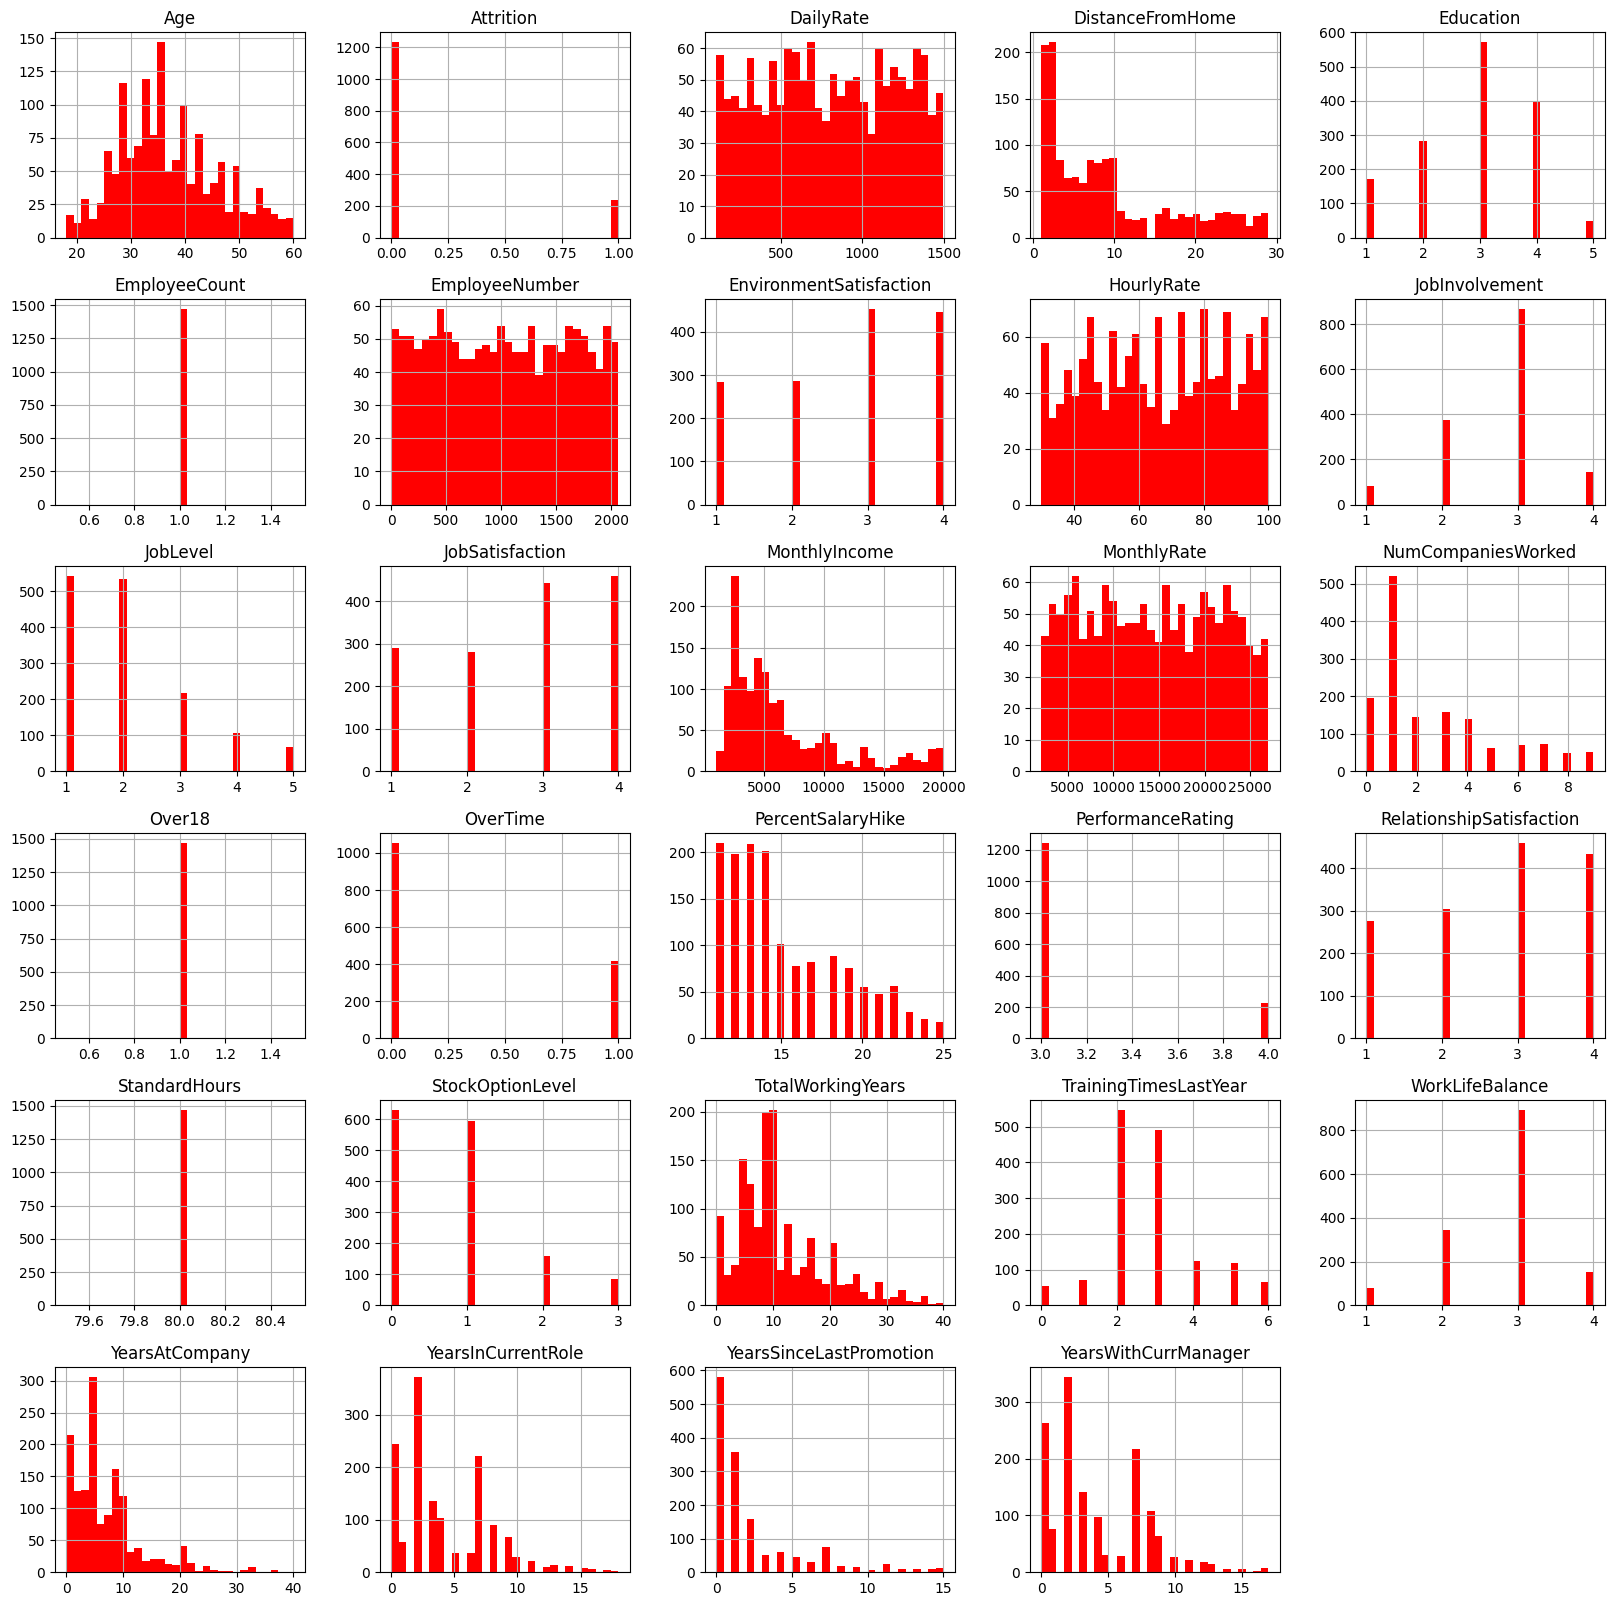

In [13]:
df_copy.hist(bins = 30, figsize = (20, 20), color = 'r')

<b>Observation:<b>

- On average, employees live approximately 9.2 units away from their workplace, the distance from home ranges from 1 unit to 29 units.
- Employees have an average of 11.3years of total working experience and total working years range from 0 to 40years.
- The average tenure at the company is around 7years.
- On average, employees have been working with their current managers for approximately 4.1years.
- The average age of employees is approximately 36.9years, the youngest employee is 18years old while the oldest is 60years old.
- Its important to note that all employees are adult. So there's no need having the "Over18" column present for our analysis.
- The EmployeeCount and StandardHours column have a constant value of 1 and 80 respectively, indicating that they do not provide any meaningfiul variation in the data.
- The EmployeeNumber column also represents a unique value to each of the employees, which will not provide any meaningful insight.
- Several features such as 'MonthlyIncome' and 'TotalWorkingHours' are tail heavy

<p><b> Since the "Over18", "EmployeeCount", "StandardHours", "EmployeeNumber" attribute would not provide any meaningful insights in our analysis we can simply drop these attributes</b></p>.

In [14]:
# Drop columns that are not needed for analysis
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=columns_to_drop, inplace=True)
df_copy.drop(columns=columns_to_drop, inplace=True)

# Output message
print("Columns dropped successfully.")

Columns dropped successfully.


In [15]:
# Let's have a look at how many employees actually left the company
left_df = df_copy[df_copy['Attrition'] == 1]
stayed_df = df_copy[df_copy['Attrition'] == 0]

In [16]:
# Count of employees who stayed or left
# We can observe that the dataset is imbalanced

print('Total = ', len(df_copy))
print('Number of employees who left = ', len(left_df))
print('% of employees who left = ', 1.*len(left_df)/len(df_copy))

print('Number of employees who stayed = ', len(stayed_df))
print('% of employees who stayed = ', 1.*len(stayed_df)/len(df_copy))

Total =  1470
Number of employees who left =  237
% of employees who left =  0.16122448979591836
Number of employees who stayed =  1233
% of employees who stayed =  0.8387755102040816


<Axes: >

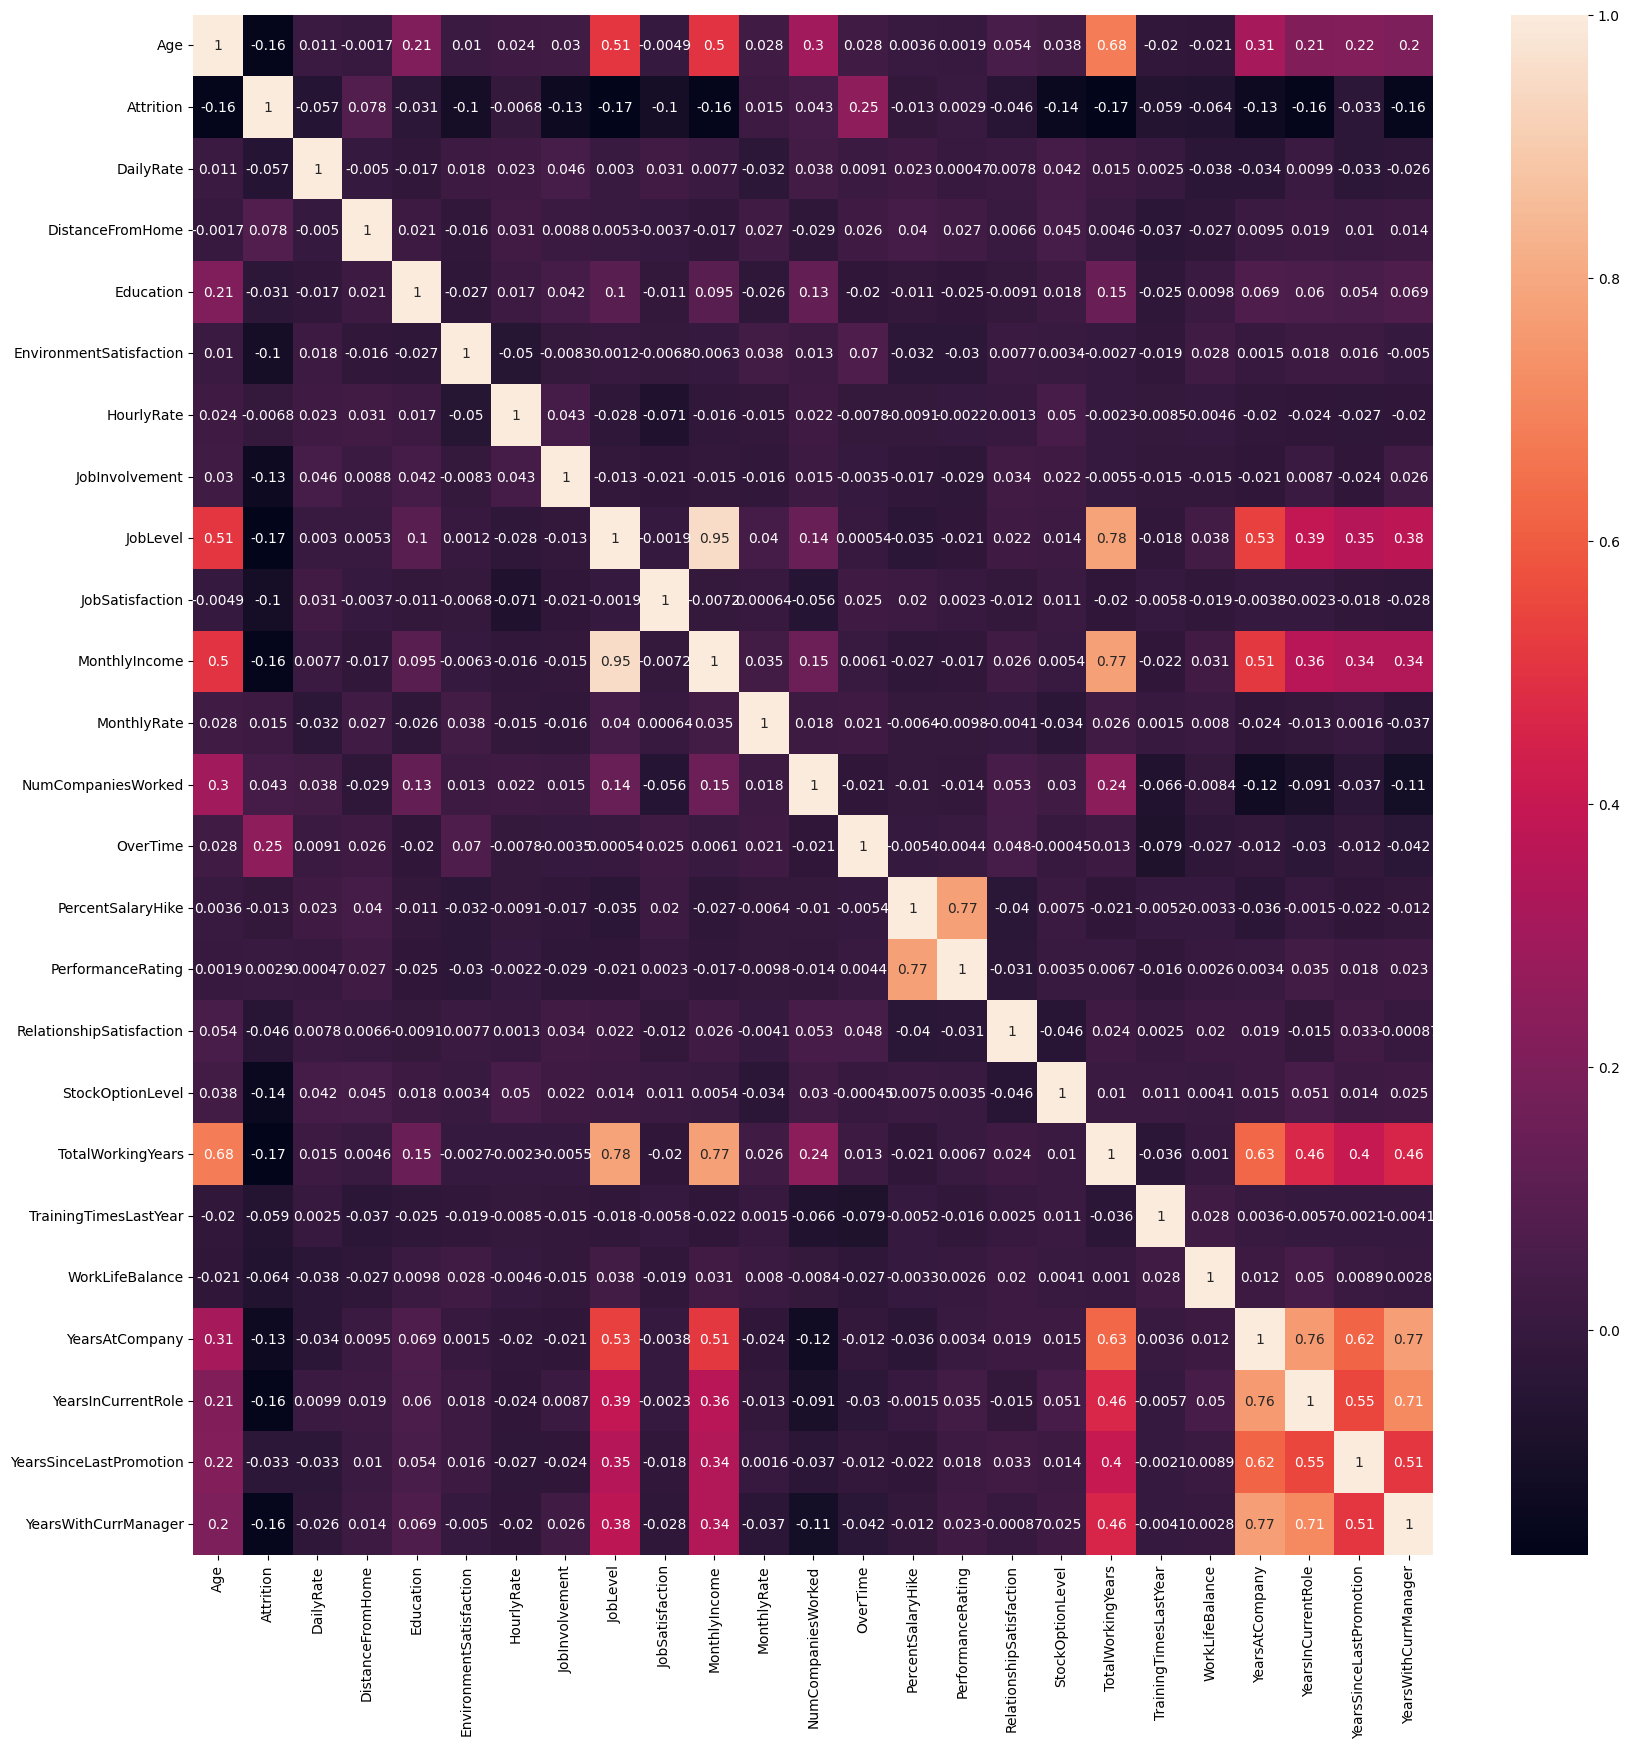

In [17]:
correlations = df_copy.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap (correlations, annot = True)

# Job level is stronly correlated with total working years
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working years
# Age is strongly correlated with total working years and monthly income
# PercentSalaryHike is strongly correlated with performance rating

In [18]:
# # Categorization of Numerical Features to Categorical Features for the purpose of visualization.

# ## Please note that the values used to label the columns below have been provided in "Dataset Description" explained above.

# column_mapping = {
#     "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
#     "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
#     "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
# #     "JobLevel": {1: "Entry Level", 2: "Junior Level", 3: "Mid Level", 4: "Senior Level", 5: "Executive Level"},
#     "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
#     "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
#     "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
#     "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"},
# #     "StockOptionLevel": {
# #         0: "No stock options granted",
# #         1: "Stock options granted at a discount",
# #         3: "Stock options granted at a market price",
# #         4: "Stock options granted at a premium price"
# #     }
# }

# for column, mapping in column_mapping.items():
#     df[column] = df[column].replace(mapping)

# print("Categorization of Numerical Features Completed!")

In [19]:
# # Select categorical columns from the dataframe
# sample_df = df.select_dtypes(include="O").sample(5)

# # Sample 5 rows from the categorical columns and apply style
# styled_df = sample_df.style.set_properties(**{'background-color': '#F0E4D7',
#                                               'color': 'black', 'border-color': '#A3897F'})

# # Display the styled sample
# styled_df

In [20]:
# Conducting descriptive analysis on categorical variables.

df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


<b>Note:<b>

- Count: It represents the non-missing value count for each column.
- Unique: It indicates the number of distinct or unique values present in each column.
- Top: It displays the most frequent categorical value observed in each column.
- Freq: It denotes the frequency of the most common categorical value appearing in each column.

<b>Observation:<b>

- All categorical attributes are having low cardinality.
- Atttrition and Overtime column is highly biased towards "No" Category.
- EducationField is highly biased towards "Life Sciences" (606 occurrences out of 1470).
- BusinessTravel attributes is highly biased towards "Travel_Rarely" (1043 occurrences out of 1470).

<p><b> Please note that low or high cardinality is determined by the number of unique categories present in each column. The bias towards a particular category is based on the frequency (freq) of that category compared to others in the same column.</b></p>.

In [21]:
# Investigating the Distinct Values of Categorical Variables

cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    unique_values = set(df[column])
    print(f"Unique values of {column}: {unique_values}")
    print("-" * 80)

Unique values of Attrition: {'Yes', 'No'}
--------------------------------------------------------------------------------
Unique values of BusinessTravel: {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
--------------------------------------------------------------------------------
Unique values of Department: {'Sales', 'Human Resources', 'Research & Development'}
--------------------------------------------------------------------------------
Unique values of EducationField: {'Other', 'Human Resources', 'Marketing', 'Technical Degree', 'Life Sciences', 'Medical'}
--------------------------------------------------------------------------------
Unique values of Gender: {'Female', 'Male'}
--------------------------------------------------------------------------------
Unique values of JobRole: {'Manufacturing Director', 'Research Scientist', 'Sales Executive', 'Sales Representative', 'Human Resources', 'Healthcare Representative', 'Manager', 'Laboratory Technician', 'Research Dire

<b>Observation:<b>

- The set of values for the categorical attributes is comprehensive and straightforward to comprehend.

# Target Variable

## Visualizing the Employee Attrition Rate

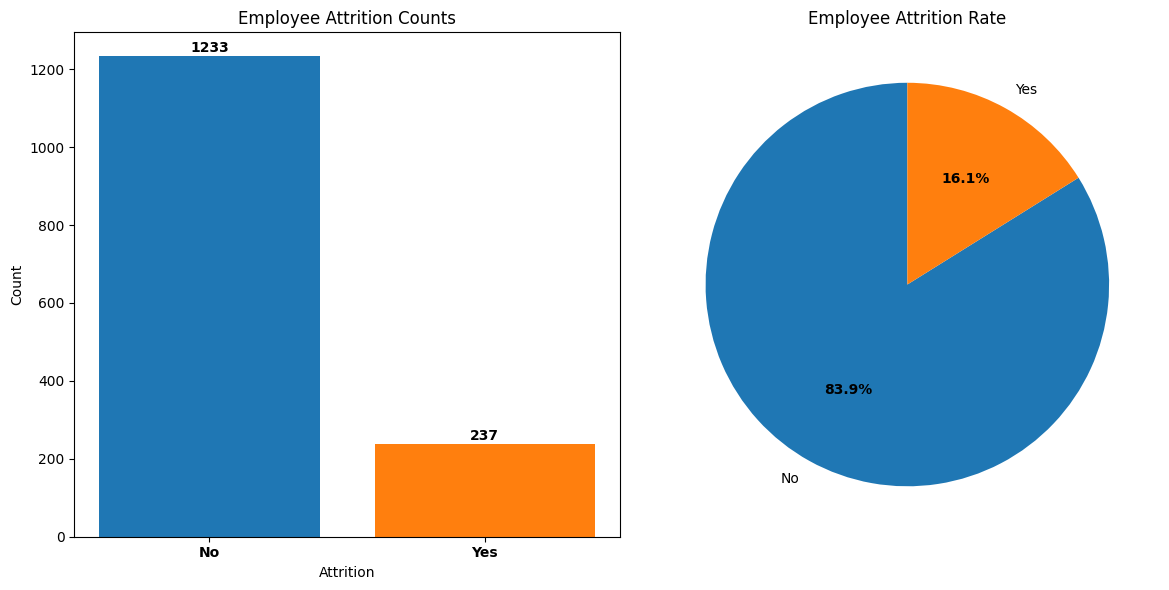

In [22]:
# Calculate the count of attrition categories
attrition_counts = df['Attrition'].value_counts()

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar chart
bar_plot = ax1.bar(attrition_counts.index, attrition_counts.values, color=['#1f77b4', '#ff7f0e'])

# Add count labels above the bars
for bar in bar_plot:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 10, height, ha='center', fontweight='bold')

# Set the labels and title for the bar chart
ax1.set_xlabel('Attrition')
ax1.set_ylabel('Count')
ax1.set_title('Employee Attrition Counts')

# Plot the pie chart
pie_plot = ax2.pie(attrition_counts.values, labels=attrition_counts.index, colors=['#1f77b4', '#ff7f0e'],
                   autopct='%1.1f%%', startangle=90)

# Set the title for the pie chart
ax2.set_title('Employee Attrition Rate')

# Set font properties for bold text
font_props = fm.FontProperties(weight='bold')

# Set bold font for x-axis tick labels in bar chart
ax1.set_xticklabels(attrition_counts.index, fontproperties=font_props)

# Set bold font for percentage labels in pie chart
for text in pie_plot[2]:
    text.set_fontproperties(font_props)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the chart
plt.show()

<b>Observation:</b>

- The employee attrition rate is 16.1%, this suggest some level of imbalance between employees who left (Yes) and those who stayed (No).
- The data is skewed towards the "No" category indicating a higher proportion of employees who chose not to leave the company.
- This imbalance can have implications when building our predictive models, as it may affect the accuracy and reliability of results.

<b> An attrition rate of 16.1% isn't good for the company. It's a value that should alarm HR team to think about ways to make more employees stay.</b>

# Exploratory Data Analysis

 ## Analyzing Employee Attrition by Department.

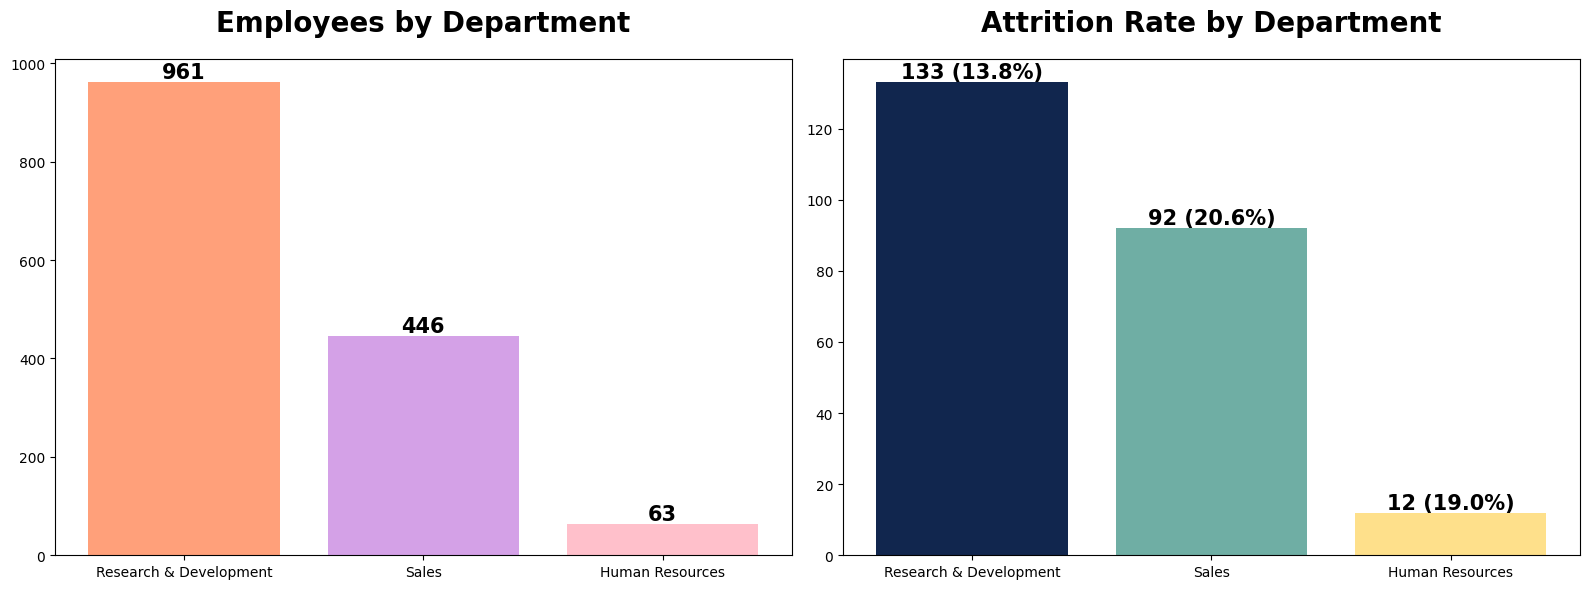

In [23]:
# Calculate total employees by department
value_1 = df["Department"].value_counts()
colors_1 = ["#FFA07A", "#D4A1E7", "#FFC0CB"]

# Calculate employee attrition rate by department
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = (value_2 / value_1 * 100).values
colors_2 = ["#11264e", "#6faea4", "#FEE08B"]

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Employees by Department
axs[0].bar(value_1.index, value_1.values, color=colors_1)
axs[0].set_title("Employees by Department", fontweight="bold", size=20, pad=20)
for index, value in enumerate(value_1.values):
    axs[0].text(index, value, f"{value}", ha="center", va="bottom", fontweight="bold", size=15)

# Plot Employee Attrition Rate by Department
axs[1].bar(value_2.index, value_2.values, color=colors_2)
axs[1].set_title("Attrition Rate by Department", fontweight="bold", size=20, pad=20)
for index, value in enumerate(value_2):
    axs[1].text(index, value, f"{value} ({attrition_rate[index]:.1f}%)", ha="center", va="bottom",
                size=15, fontweight="bold")

plt.tight_layout()
plt.show()

<b>Observation:</b>

- Majority of the employees are from Research & Development Department.
- Highest attrition rate is in the sales department at 20.6%, followed by Human Resources at 19.0%.
- Although the highest employees are in the R & D Department, there is least attrition (13.8%) compared to other departments.

 ## Analyzing Employee Attrition by Education Field.

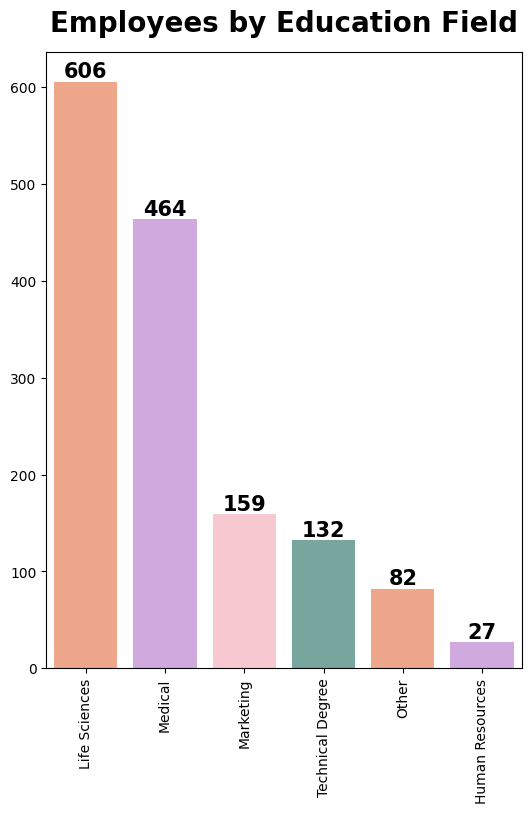

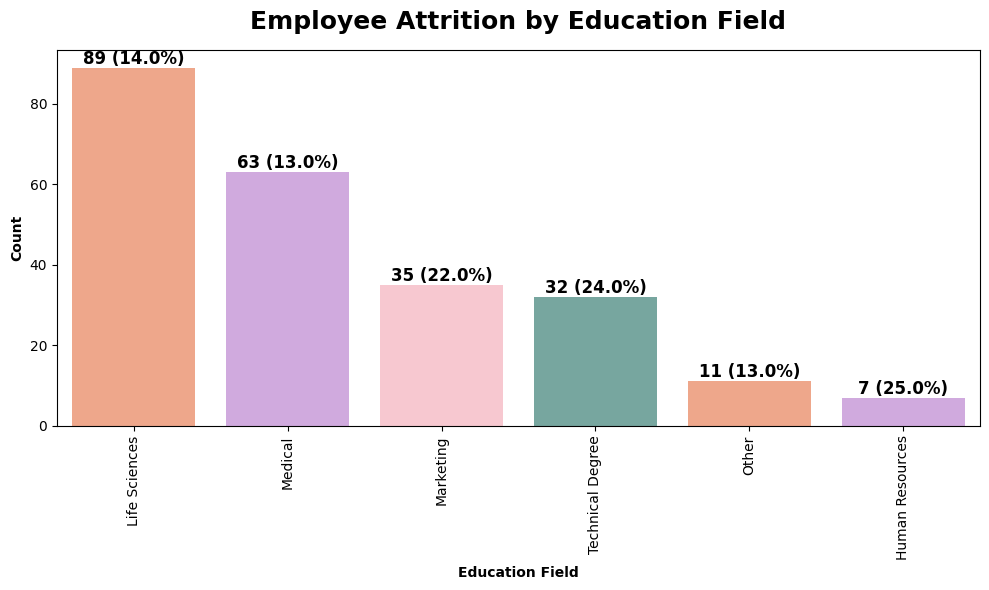

In [24]:
# Visualization to show Total Employees by Education Field
plt.figure(figsize=(13.5, 8))

# Subplot 1: Total Employees by Education Field
plt.subplot(1, 2, 1)
value_1 = df["EducationField"].value_counts()
colors = ["#FFA07A", "#D4A1E7", "#FFC0CB", "#6faea4"]
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=colors)
plt.title("Employees by Education Field", fontweight="bold", size=20, pad=15)
for index, value in enumerate(value_1.values):
    plt.text(index, value, str(value), ha="center", va="bottom", fontweight="bold", size=15)
plt.xticks(rotation=90)

# Visualization to show Employee Attrition by Education Field
plt.figure(figsize=(10, 6))

# Bar plot
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
colors_2 = ["#FFA07A", "#D4A1E7", "#FFC0CB", "#6faea4"]
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=colors_2)

plt.title("Employee Attrition by Education Field", fontweight="bold", size=18, pad=15)
plt.xlabel("Education Field", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.xticks(rotation=90)

# Add data labels to the bars
for index, value in enumerate(value_2.values):
     plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="bold",size=12)

plt.tight_layout()
plt.show()

<b>Observation:</b>
    
- The majority of employees belong to the Life Sciences or Medical Education Field.
- The Human Resources Education Field has a significantly lower representation among employees.
- Education Fields such as Human Resources, Technical and Marketing exhibit a high attrition rate at 25.0%, 24.0% and 22.0% respectively.
- This could be attributed to workload since these education fields have a smaller number of employees compared to fields with a lower attrition rate.

 ## Analyzing Employee Attrition by Job Role

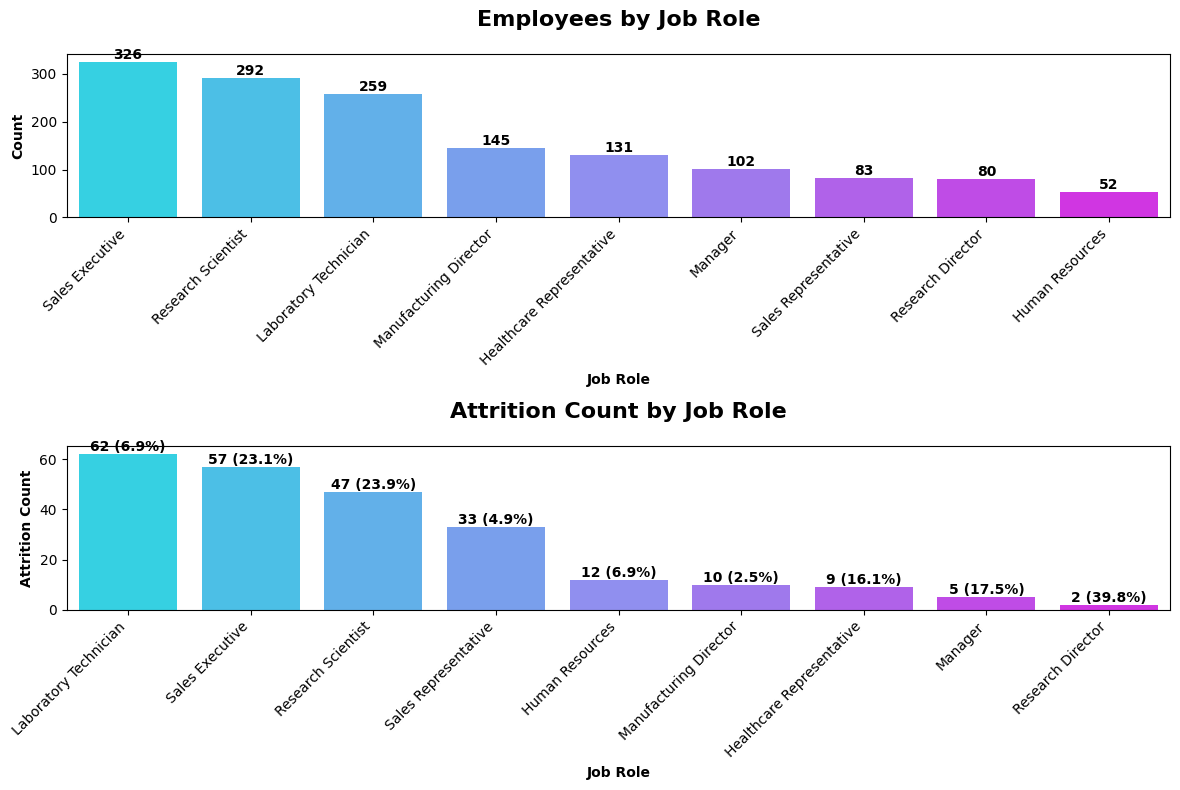

In [25]:
plt.figure(figsize=(12, 8))

# Visualization to show Employee Attrition by Job Role
plt.subplot(2, 1, 1)
value_1 = df["JobRole"].value_counts()
attrition_counts = new_df["JobRole"].value_counts()
attrition_rate = (attrition_counts / value_1) * 100

sns.barplot(x=value_1.index, y=value_1.values, palette="cool")
plt.title("Employees by Job Role", fontweight="bold", size=16, pad=20)
plt.ylabel("Count", fontweight="bold")
plt.xlabel("Job Role", fontweight="bold")
plt.xticks(rotation=45, ha="right")

# Add data labels to the bar plot
for index, value in enumerate(value_1.values):
    plt.text(index, value, str(value), ha="center", va="bottom", fontweight="bold")

plt.subplot(2, 1, 2)
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="cool")
plt.title("Attrition Count by Job Role", fontweight="bold", size=16, pad=20)
plt.ylabel("Attrition Count", fontweight="bold")
plt.xlabel("Job Role", fontweight="bold")
plt.xticks(rotation=45, ha="right")

# Add data labels and attrition rate to the bar plot
for index, value in enumerate(attrition_counts.values):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.1f}%)", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

<b>Observation:</b>
    
- The majority of employees in this organization work as Sales Executives, Research Scientists, or Laboratory Technicians.
- The sectors with the highest attrition rates are Research Directors, Research Scientists and Sales Executive.

 ## Analyzing Employee Attrition by Gender

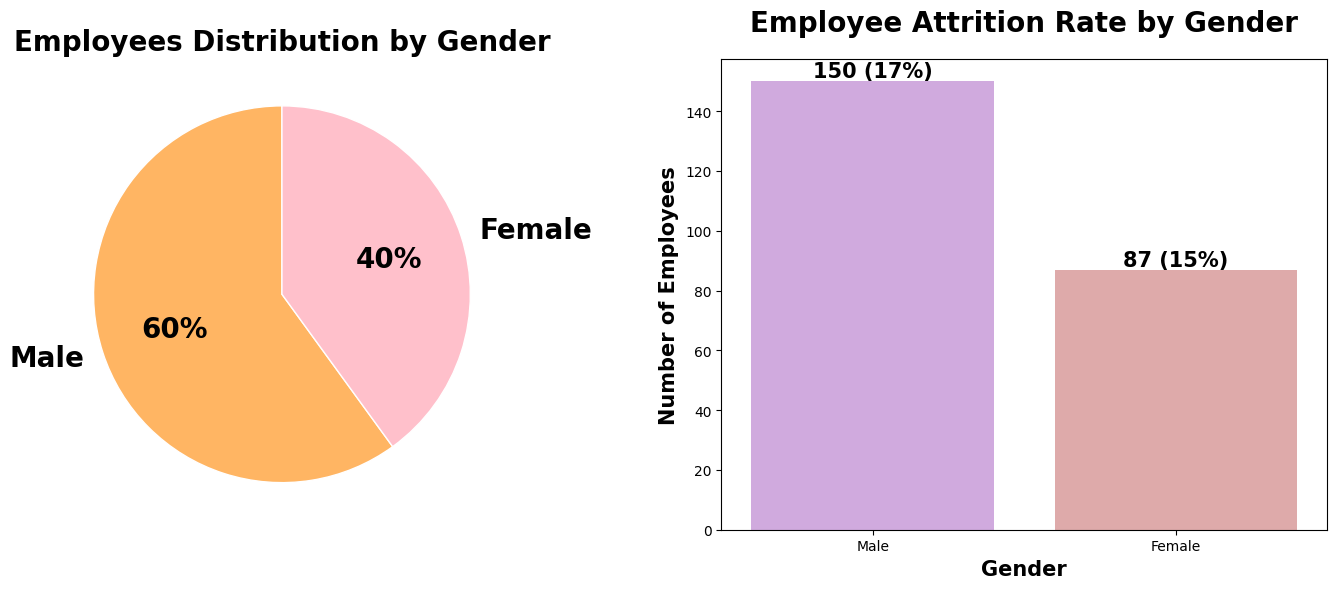

In [26]:
# Visualization to show Total Employees by Gender
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
gender_counts = df["Gender"].value_counts()
colors = ["#ffb563", "#FFC0CB"]
plt.title("Employees Distribution by Gender", fontweight="bold", size=20)
plt.pie(gender_counts, autopct="%.0f%%", labels=gender_counts.index, textprops={"fontweight": "bold", "size": 20},
        startangle=90, colors=colors, wedgeprops={"edgecolor": "white"})

# Visualization to show Employee Attrition by Gender
plt.subplot(1, 2, 2)
new_df = df[df["Attrition"] == "Yes"]
attrition_counts = new_df["Gender"].value_counts()
attrition_rate = (attrition_counts / gender_counts) * 100
colors = ["#D4A1E7", "#E7A1A1"]
ax = sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=colors)
plt.title("Employee Attrition Rate by Gender", fontweight="bold", size=20, pad=20)
plt.xlabel("Gender", fontweight="bold", size=15)
plt.ylabel("Number of Employees", fontweight="bold", size=15)

# Annotating the bars with attrition rate percentages
for index, value in enumerate(attrition_counts):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.0f}%)", ha="center", va="bottom",
             size=15, fontweight="bold")

plt.tight_layout()
plt.show()

<b>Observation:</b>
    
- The organization has a significantly higher number of male employees, surpassing the female employees by more than 20%.
- The attrition rate among male employees is higher compared to that of female employees, indicating a greater tendency for males to leave the organization.

 ## Analyzing Employee Attrition by Age.

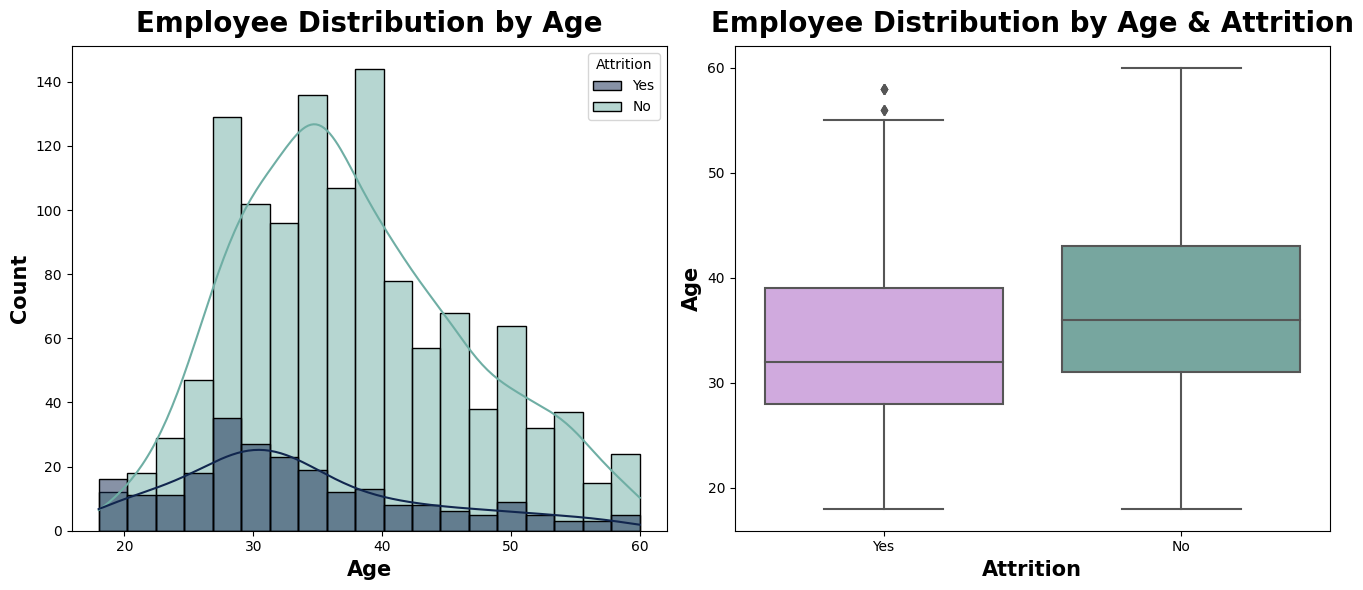

In [27]:
# Visualization to show Employee Distribution by Age
plt.figure(figsize=(13.5, 6))
plt.subplot(1, 2, 1)
sns.histplot(x="Age", hue="Attrition", data=df, kde=True, palette=["#11264e", "#6faea4"])
plt.title("Employee Distribution by Age", fontweight="bold", size=20, pad=10)
plt.xlabel("Age", fontweight="bold", size=15)
plt.ylabel("Count", fontweight="bold", size=15)

# Visualization to show Employee Distribution by Age & Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="Age", data=df, palette=["#D4A1E7", "#6faea4"])
plt.title("Employee Distribution by Age & Attrition", fontweight="bold", size=20, pad=10)
plt.xlabel("Attrition", fontweight="bold", size=15)
plt.ylabel("Age", fontweight="bold", size=15)

plt.tight_layout()
plt.show()

<b>Observation:</b>
    
- The majority of employees fall within the age range of 30 to 40.
- There is a noticeable trend where attrition tends to decrease as age increases.
- The boxplot reveals that the median age of employees who left the organization is lower than that of employees who are still working.
- Younger employees are more likely to leave the company compared to older employees.

 ## Analyzing Employee Attrition by Education.

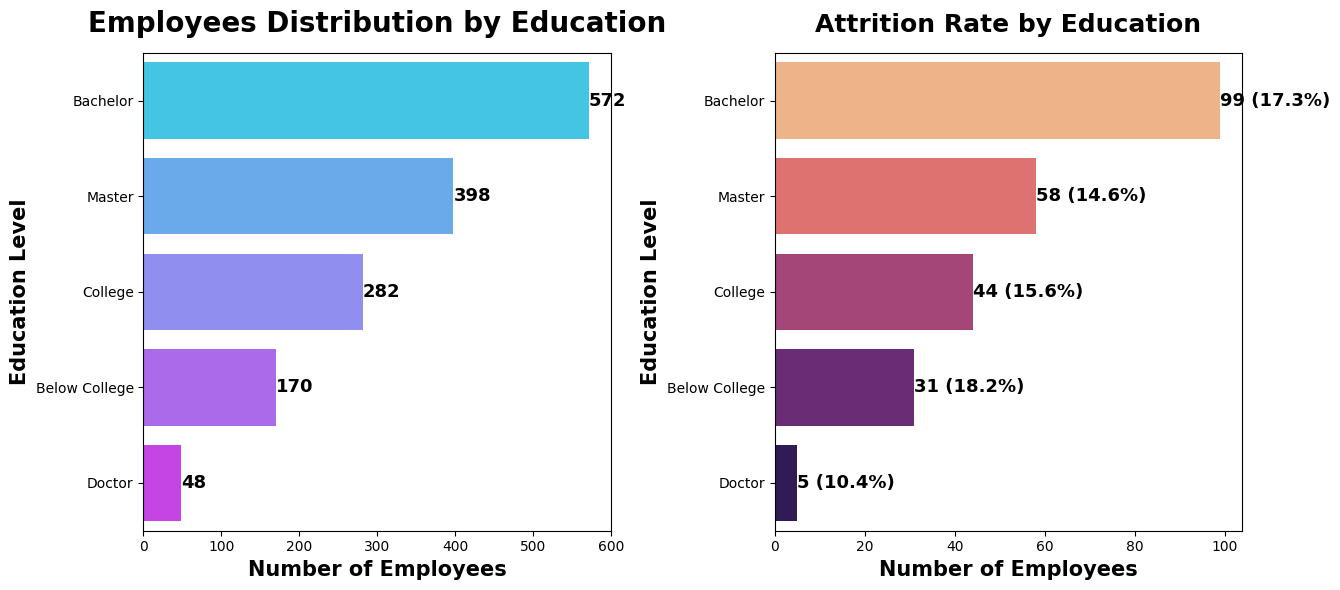

In [28]:
# Visualization to show Total Employees by Education
edu = {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"}
plt.figure(figsize=(13.5, 6))
plt.subplot(1, 2, 1)
value_1 = df["Education"].map(edu).value_counts()  # map numerical values to categorical labels
sns.barplot(x=value_1.values, y=value_1.index, order=value_1.index, palette="cool")
plt.title("Employees Distribution by Education", fontweight="bold", size=20, pad=15)
plt.xlabel("Number of Employees", fontweight="bold", size=15)
plt.ylabel("Education Level", fontweight="bold", size=15)

# Annotating the bars with the number of employees
for index, value in enumerate(value_1):
    plt.text(value, index, str(value), ha="left", va="center", fontweight="bold", size=13)

# Visualization to show Employee Attrition by Education
plt.subplot(1, 2, 2)
value_2 = new_df["Education"].map(edu).value_counts()  # map numerical values to categorical labels
attrition_rate = (value_2 / value_1) * 100
ax = sns.barplot(x=value_2.values, y=value_2.index, order=value_1.index, palette="magma_r")
plt.title("Attrition Rate by Education", fontweight="bold", size=18, pad=15)
plt.xlabel("Number of Employees", fontweight="bold", size=15)
plt.ylabel("Education Level", fontweight="bold", size=15)

# Annotating the bars with attrition rate percentages
for index, value in enumerate(value_2):
    plt.text(value, index, f"{value} ({attrition_rate[index]:.1f}%)", ha="left", va="center",
             fontweight="bold", size=13)

plt.tight_layout()
plt.show()

<b>Observation:</b>
    
- The majority of employees in the organization hold either a Bachelor's or Master's degree as their educational qualification.
- There is a small number of employees who have completed a Doctorate degree as their educational qualification.
- A noticeable trend can be observed: as the level of education qualification increases, the attrition rate tends to decrease.

# Hypothesis Testing

<b> A. Does age play a role in employee attrition? Are younger or older employees more likely to leave the company? </b>

<b> Research Question 1:</b> Is there a significant difference in employee attrition based on age? Are younger or older employees more likely to leave the company?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition based on age.

<b> Alternative Hypothesis: </b> There is a significant difference in employee attrition based on age.

<b>Statistical Test Selection:</b>
The two-sample t-test is appropriate for this hypothesis because it allows us to compare the means of two independent groups: employees who have left the company (attrition = "Yes") and those who have stayed (attrition = "No"). Since age is a numerical variable, the t-test is a suitable statistical test for determining if there is a significant difference in attrition based on age. By calculating the t-statistic and the corresponding p-value, we can assess whether the observed difference in means is statistically significant, providing insights into the relationship between age and employee attrition.

In [29]:
# Separate data into two groups based on attrition status
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']

# Perform the two-sample t-test
alpha = 0.05
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no, equal_var=False)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 1.3797600649439775e-08


In [30]:
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on age.")

Reject the null hypothesis. There is a significant difference in attrition based on age.


<b>Inference:</b>
Since the p-value is less than the chosen significance level (alpha = 0.05), we reject the null hypothesis. This means that there is a significant difference in attrition based on age. In other words, the age of employees appears to play a role in their likelihood of leaving the company. The small p-value suggests that the observed difference in means between the age groups of employees who have left and those who have stayed is unlikely to occur by random chance alone. Therefore, there is strong evidence to support the alternative hypothesis that there is a significant difference in attrition based on age.

This finding indicates that age is a factor that influences employee attrition, and further investigation and analysis can be conducted to understand the specific relationship and implications.

<b> B. Does the frequency of business travel impact employee attrition? Do employees who travel frequently have higher attrition rates? </b>

<b> Research Question 2:</b> Is there a significant difference in employee attrition based on the frequency of business travel?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition based on the frequency of business travel.

<b> Alternative Hypothesis: </b> There is a significant difference in employee attrition based on the frequency of business travel.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in employee attrition based on the frequency of business travel, we can use the chi-square test of independence. The chi-square test is suitable for analyzing the relationship between two categorical variables. The chi-square test of independence assesses whether there is a relationship between two categorical variables and determines if the observed association is statistically significant. In this case, we are examining the relationship between the frequency of business travel and employee attrition.

In [31]:
# Create a contingency table of business travel frequency and attrition
contingency_table = pd.crosstab(df['BusinessTravel'], df['Attrition'])

# Perform the chi-square test of independence
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 5.608614476449931e-06


In [32]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on business travel frequency.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on business travel frequency.")

Reject the null hypothesis. There is a significant difference in attrition based on business travel frequency.


<b>Inference:</b>
Since the p-value is less than the chosen significance level (alpha = 0.05), we reject the null hypothesis. This means that there is a significant difference in employee attrition based on the frequency of business travel. In other words, the frequency of business travel appears to have an impact on employee attrition rates. The small p-value suggests that the observed association between business travel frequency and attrition is unlikely to occur by random chance alone. Therefore, there is strong evidence to support the alternative hypothesis that there is a significant difference in attrition based on the frequency of business travel.

This finding indicates that employees who travel frequently may have higher attrition rates compared to those who travel less frequently.

<b> C. Is there a relationship between job satisfaction and attrition? Do employees with lower job satisfaction tend to leave the company? </b>

<b> Research Question 3</b> Is there a significant difference in job satisfaction between employees who have left the company and those who have stayed?

<b> Null Hypothesis: </b> There is no significant difference in job satisfaction between employees who have left the company and those who have stayed.

<b> Alternative Hypothesis: </b> There is a significant difference in job satisfaction between employees who have left the company and those who have stayed.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in job satisfaction based on attrition status, we can use the chi-square test of independence. The chi-square test of independence is suitable for analyzing the association between two categorical variables. The chi-square test of independence is appropriate for this analysis because it allows us to examine whether there is an association between two categorical variables: job satisfaction and attrition status. It helps determine if the observed association between the two variables is statistically significant or due to chance.

In [33]:
# Create a contingency table
contingency_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 0.0005563004510387556


In [34]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in job satisfaction based on attrition.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in job satisfaction based on attrition.")

Reject the null hypothesis. There is a significant difference in job satisfaction based on attrition.


<b>Inference:</b>
With a p-value of 0.0005563004510387556 (which is smaller than the significance level of 0.05), we can draw the following inference: Since the p-value is less than the chosen significance level, we reject the null hypothesis. This implies that there is a significant difference in job satisfaction based on attrition. In other words, employees who have left the company are likely to have different levels of job satisfaction compared to those who have stayed. The small p-value suggests that the observed association between job satisfaction and attrition is unlikely to occur by random chance alone. Therefore, we have strong evidence to support the alternative hypothesis that there is a significant difference in job satisfaction based on attrition.

This finding indicates that job satisfaction is a factor that influences employee attrition.

<b> D. Does the level of monthly income influence employee attrition? Are employees with lower salaries more likely to leave? </b>

<b> Research Question 4</b> Is there a significant difference in employee attrition based on the level of monthly income?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition based on the level of monthly income.

<b> Alternative Hypothesis: </b> There is a significant difference in employee attrition based on the level of monthly income.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in employee attrition based on monthly income, we can use the two-sample t-test or Mann-Whitney U test. The choice between the two tests depends on the distribution of the data and whether the assumptions of the t-test are met.

*Explanation:*

- <b>Two-sample t-test:</b> The two-sample t-test assumes that the data follow a normal distribution within each group (employees who have left and those who have stayed). If the data meet the normality assumption, the t-test can be used to compare the means of the monthly income between the two groups.

- <b>Mann-Whitney U test:</b> The Mann-Whitney U test is a non-parametric test that does not rely on the assumption of normality. It compares the distributions of the monthly income between the two groups without assuming a specific distribution shape.

To determine which test is suitable, we need to assess the distribution of the monthly income data for both groups. If the data approximately follow a normal distribution, the two-sample t-test is appropriate. If the data are skewed or do not meet the normality assumption, the Mann-Whitney U test can be used.

In [35]:
# Separate data into two groups based on attrition status
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Assess the distribution of the data
if stats.normaltest(attrition_yes).pvalue > 0.05 and stats.normaltest(attrition_no).pvalue > 0.05:
    # Use the two-sample t-test if the data follow a normal distribution
    t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no, equal_var=False)
    test_used = "Two-sample t-test"
else:
    # Use the Mann-Whitney U test if the data are not normally distributed
    U_stat, p_value = stats.mannwhitneyu(attrition_yes, attrition_no, alternative="two-sided")
    test_used = "Mann-Whitney U test"

# Print the p-value and the test used
print("The p-value is:", p_value)
print("Statistical test used:", test_used)

The p-value is: 2.950830917288873e-14
Statistical test used: Mann-Whitney U test


In [36]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on monthly income.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on monthly income.")

Reject the null hypothesis. There is a significant difference in attrition based on monthly income.


<b>Inference:</b>
With a p-value of 2.950830917288873e-14 (a very small value), obtained from the Mann-Whitney U test, we can draw the following inference:

The statistical test suggests that there is a significant difference in employee attrition based on the level of monthly income. Specifically, employees with lower salaries are more likely to leave the company. The small p-value indicates that the observed difference in monthly income between employees who have left and those who have stayed is highly unlikely to occur by random chance alone. Therefore, we reject the null hypothesis and conclude that there is a significant association between monthly income and employee attrition.

This finding highlights the importance of considering the impact of income levels on employee attrition. Lower salaries may contribute to higher attrition rates, suggesting the need for strategies such as competitive compensation packages or financial incentives to mitigate attrition among employees with lower incomes.

<b> E. Does the length of time an employee has been with the company affect attrition? Do employees with shorter tenures have higher attrition rates? </b>

<b> Research Question 5:</b> Is there a significant difference in employee attrition based on the length of time an employee has been with the company?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition based on the length of time an employee has been with the company.

<b> Alternative Hypothesis:</b> There is a significant difference in employee attrition based on the length of time an employee has been with the company.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in employee attrition based on the length of time with the company, we can use the two-sample t-test (also known as independent t-test) because it is suitable for comparing the means of two independent groups. In this case, the two independent groups are employees who have left the company (Attrition = "Yes") and employees who have stayed (Attrition = "No").

The two-sample t-test is appropriate for this analysis because it allows us to compare the means of a numerical variable (years at the company) between two distinct groups (attrition status). It helps us determine if the observed difference in means between the two groups is significant or due to random chance.

In [37]:
# Separate data into two groups based on attrition status
attrition_yes = df[df['Attrition'] == 'Yes']['YearsAtCompany']
attrition_no = df[df['Attrition'] == 'No']['YearsAtCompany']

# Perform the two-sample t-test
alpha = 0.05
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no, equal_var=False)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 2.2859051752725144e-07


In [38]:
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on years at the company.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on years at the company.")

Reject the null hypothesis. There is a significant difference in attrition based on years at the company.


<b>Inference:</b>
With a p-value of 2.2859051752725144e-07 (a very small value), we can draw the following inference:

Since the p-value is less than the chosen significance level (alpha = 0.05), we reject the null hypothesis. This indicates that there is a significant difference in employee attrition based on the length of time an employee has been with the company. In other words, the length of time at the company appears to have an impact on employee attrition rates. The small p-value suggests that the observed difference in means between the tenure groups of employees who have left and those who have stayed is highly unlikely to occur by random chance alone. Therefore, there is strong evidence to support the alternative hypothesis that there is a significant difference in attrition based on the length of time an employee has been with the company.

This finding suggests that employees with shorter tenures are more likely to have higher attrition rates compared to those with longer tenures. It indicates that the length of time an employee has been with the company plays a role in their likelihood of leaving.

<b> F. Is there a correlation between education level and attrition? Do employees with higher levels of education have different attrition rates? </b>

<b> Research Question 6:</b> Is there a correlation between education level and attrition?

<b> Null Hypothesis: </b> There is no significant difference in attrition based on education level.

<b> Alternative Hypothesis:</b> There is a significant difference in attrition based on education level.

<b>Statistical Test Selection:</b>
To analyze the correlation between education level and attrition, we can use the chi-square test of independence. The chi-square test is suitable for analyzing the relationship between two categorical variables. In this case, we have the education level (categorical) and attrition (categorical) variables.

The chi-square test of independence allows us to determine if there is a significant association between two categorical variables. It assesses whether the observed frequencies in each category differ significantly from the frequencies we would expect if the two variables were independent. By comparing the observed frequencies of attrition for each education level with the expected frequencies, we can evaluate whether there is a significant difference in attrition based on education level.

In [39]:
# Create a contingency table of education level and attrition
contingency_table = pd.crosstab(df['Education'], df['Attrition'])

# Perform the chi-square test of independence
alpha = 0.05
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 0.5455253376565949


In [40]:
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on education level.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on education level.")

Fail to reject the null hypothesis. There is no significant difference in attrition based on education level.


<b>Inference:</b>
With a p-value of 0.5455253376565949 (a relatively large value), we can draw the following inference:

Since the p-value is greater than the chosen significance level (alpha = 0.05), we fail to reject the null hypothesis. This suggests that there is no significant correlation between education level and attrition among employees. In other words, the level of education does not appear to have a substantial impact on employee attrition rates in this dataset.

The larger p-value indicates that the observed correlation coefficient (if any) between education level and attrition is likely due to random chance rather than a meaningful relationship. Therefore, we do not have enough evidence to support the alternative hypothesis that there is a significant correlation between education level and attrition.

In conclusion, based on the p-value and the statistical test results, we do not find a significant correlation between education level and attrition among employees in this dataset.

<b> G. Is there a gender-based difference in employee attrition? Do male and female employees have different attrition rates? </b>

<b> Research Question 7:</b> Is there a gender-based difference in employee attrition?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition between genders.

<b> Alternative Hypothesis:</b> There is a significant difference in employee attrition between genders.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant gender-based difference in employee attrition, we can use the chi-square test of independence. This test is suitable when both variables are categorical, as in this case, where "Gender" and "Attrition" are categorical variables with "Yes" and "No" values.

The chi-square test of independence is appropriate for this analysis because it examines the relationship between two categorical variables (gender and attrition). It helps determine if there is a significant association between the two variables or if the observed differences are due to chance.

In [41]:
# Create a contingency table of Gender and Attrition
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 0.29057244902890855


In [42]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant gender-based difference in employee attrition.")
else:
    print("Fail to reject the null hypothesis. There is no significant gender-based difference in employee attrition.")

Fail to reject the null hypothesis. There is no significant gender-based difference in employee attrition.


<b>Inference:</b>
With a p-value of 0.29057244902890855, which is greater than the chosen significance level (alpha = 0.05), we fail to reject the null hypothesis. Therefore, based on the data and the results of the chi-square test of independence, we do not have sufficient evidence to conclude that there is a significant gender-based difference in employee attrition.

In other words, the p-value suggests that any observed differences in attrition rates between male and female employees could be due to chance rather than a true gender-based difference. The data does not provide strong evidence to support the alternative hypothesis that there is a significant difference in attrition rates between genders.

As a result, the analysis indicates that gender does not appear to be a significant factor influencing employee attrition rates in this dataset. However, it's important to note that this conclusion is based on the specific dataset and analysis performed.

<b> H. Does work-life balance impact attrition? Do employees with poor work-life balance tend to leave the company? </b>

<b> Research Question 8:</b> Is there a significant difference in employee attrition based on work-life balance?

<b> Null Hypothesis: </b> There is no significant difference in employee attrition based on work-life balance.

<b> Alternative Hypothesis:</b> There is a significant difference in employee attrition based on work-life balance.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in employee attrition based on work-life balance, we can use the chi-square test of independence because it is suitable for analyzing the association between two categorical variables. In this case, the categorical variables are work-life balance and attrition status.

The chi-square test of independence is appropriate for this analysis because it allows us to examine the association between two categorical variables and determine if there is a significant relationship between them. It tests the null hypothesis that the two variables are independent of each other (no association) against the alternative hypothesis that there is a significant association.

In [43]:
# Create a contingency table
contingency_table = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 0.0009725698845348824


In [44]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition based on work-life balance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition based on work-life balance.")

Reject the null hypothesis. There is a significant difference in attrition based on work-life balance.


<b>Inference:</b>
With a p-value of 0.0009725698845348824 (which is less than the chosen significance level of 0.05), we can draw the following inference:

Since the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis. This indicates that there is a significant difference in employee attrition based on work-life balance. In other words, work-life balance does impact attrition, and employees with poor work-life balance are more likely to leave the company.

The small p-value suggests that the observed association between work-life balance and attrition is unlikely to occur by random chance alone. Thus, there is strong evidence to support the alternative hypothesis that there is a significant difference in employee attrition based on work-life balance.

This finding highlights the importance of work-life balance in employee retention and implies that improving work-life balance measures might reduce attrition rates within the company.

<b> I. Is there a variation in attrition rates among different departments? Are employees in certain departments more likely to leave than others? </b>

<b> Research Question 9:</b> Is there a significant difference in attrition rates among different departments?

<b> Null Hypothesis: </b> There is no significant difference in attrition rates among different departments.

<b> Alternative Hypothesis:</b> There is a significant difference in attrition rates among different departments.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in attrition rates among different departments, we can use the chi-square test of independence. The chi-square test is suitable for analyzing the association between two categorical variables, such as department (categorical) and attrition (categorical).

The chi-square test of independence allows us to examine whether there is a relationship between two categorical variables and determine if any observed differences in the distribution of frequencies are statistically significant. In this case, we are interested in investigating if there is a significant association between the department employees belong to and their attrition status.

In [45]:
# Create a contingency table of department and attrition
contingency_table = pd.crosstab(df['Department'], df['Attrition'])

# Perform the chi-square test of independence
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 0.004525606574479633


In [46]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition rates among different departments.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition rates among different departments.")

Reject the null hypothesis. There is a significant difference in attrition rates among different departments.


<b>Inference:</b>
With a p-value of 0.004525606574479633 (which is less than the chosen significance level of 0.05), we can draw the following inference:

Since the p-value is less than the significance level, we reject the null hypothesis. This indicates that there is a significant difference in attrition rates among different departments. In other words, employees in certain departments are more likely to leave the company than employees in other departments.

The small p-value suggests that the observed variation in attrition rates among departments is unlikely to occur by random chance alone. This finding provides evidence to support the alternative hypothesis that there is a significant difference in attrition rates among different departments.

In summary, some departments may have higher attrition rates than others, and identifying these variations can be crucial for understanding the factors influencing employee retention and implementing targeted strategies to improve retention rates in specific departments.

<b> J. Does working overtime affect attrition? Do employees who work overtime have higher attrition rates? </b>

<b> Research Question 10:</b> Is there a significant difference in attrition rates between employees who work overtime and those who don't?

<b> Null Hypothesis: </b> There is no significant difference in attrition rates between employees who work overtime and those who don't.

<b> Alternative Hypothesis:</b> There is a significant difference in attrition rates between employees who work overtime and those who don't.

<b>Statistical Test Selection:</b>
To analyze whether there is a significant difference in attrition rates based on overtime work, we can use the chi-square test of independence. The chi-square test is suitable for analyzing the relationship between two categorical variables when we want to determine if there is a statistically significant association or dependence between them.

The chi-square test of independence is appropriate for this analysis because it allows us to examine the relationship between two categorical variables: "Overtime" (work overtime or not) and "Attrition" (yes or no). The test helps us assess whether there is a significant association between these two variables, indicating if working overtime has an impact on the attrition rates of employees.

In [47]:
# Create a contingency table
contingency_table = pd.crosstab(df['OverTime'], df['Attrition'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("The p-value is:", p_value)

The p-value is: 8.15842372153832e-21


In [48]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in attrition rates based on overtime work.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in attrition rates based on overtime work.")

Reject the null hypothesis. There is a significant difference in attrition rates based on overtime work.


<b>Inference:</b>
With a p-value of 8.15842372153832e-21 (a very small value), we can draw the following inference:

Since the p-value is much less than the chosen significance level (alpha = 0.05), we reject the null hypothesis. This means that there is a significant difference in attrition rates between employees who work overtime and those who don't. In other words, working overtime does have an impact on employee attrition rates. The small p-value suggests that the observed association between working overtime and higher attrition rates is highly unlikely to occur by random chance alone. Therefore, we have strong evidence to support the alternative hypothesis that there is a significant difference in attrition rates based on overtime work.

The inference from this analysis is that employees who work overtime are more likely to have higher attrition rates compared to those who do not work overtime. This finding indicates that overtime work may be a contributing factor to employees leaving the company.

# Feature Importance (Statistical Analysis)

We have so far performed descriptive and inferential statistics on this dataset, to analyze the most important features/attributes/columns from this dataset, let's perform a comprehensive statistical analysis all at once. We would peform ANOVA test to analyze the numerical features importance and thereafter perform chi-square test to analyze the categorical feature importance.

<b>Please note this is just 1 approach we would be taken in this study to extract the relevant features for our analysis, subsequent approach would be adopted</b>

## ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [49]:
# show columns attributes for integers

for col in df.dtypes[df.dtypes=="int64"].index.values:
    print(f"{ col } : {df[col].nunique()}\n",df[col].unique(),"\n")

Age : 43
 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

DailyRate : 886
 [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  7

The code below performs an ANOVA test (analysis of variance) to compare the F-scores and p-values between numerical columns and the "Attrition" column. It starts by selecting the numerical columns from the dataframe and creates a copy of the dataframe. Then, it replaces "No" with 0 and "Yes" with 1 in the "Attrition" column. The code calculates the F-scores and p-values using the stats.f_oneway function in a loop over the numerical columns. It then plots the F-scores using a barplot and creates a dataframe test_df containing the features, F-scores, and p-values for further analysis.

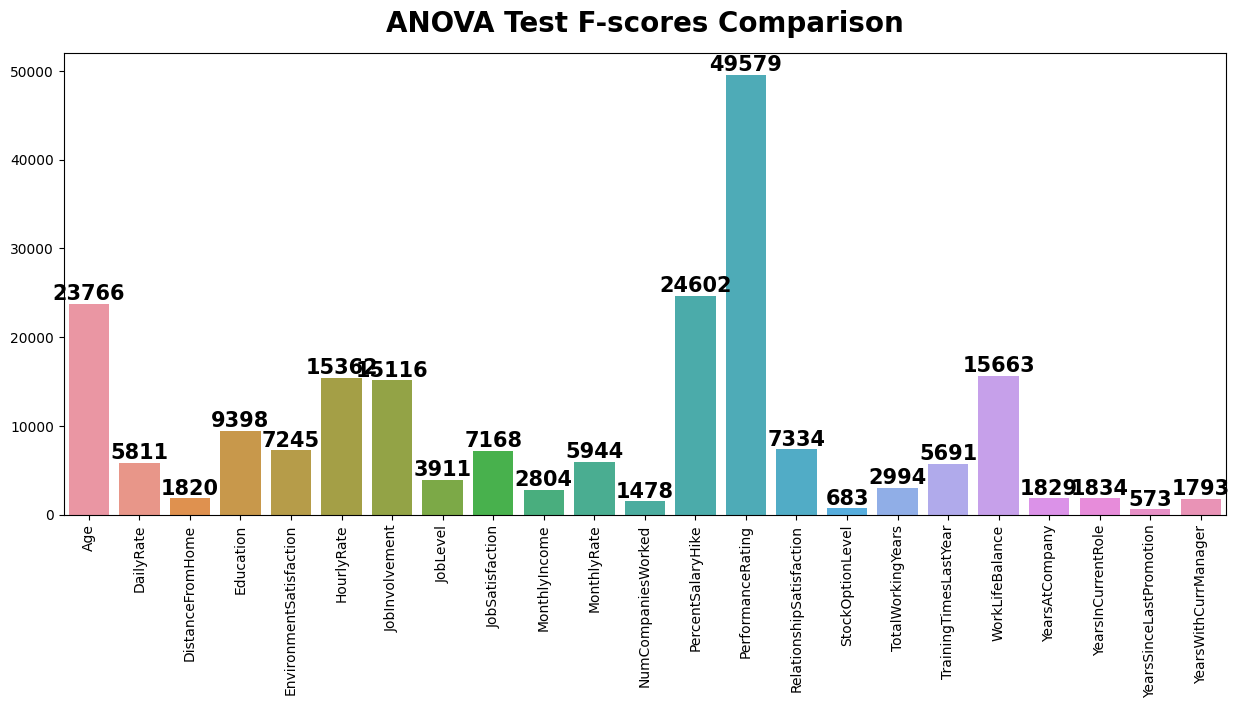

Top Features to Consider:
['PerformanceRating', 'PercentSalaryHike', 'Age', 'WorkLifeBalance', 'HourlyRate', 'JobInvolvement', 'Education', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyRate', 'DailyRate', 'TrainingTimesLastYear', 'JobLevel', 'TotalWorkingYears', 'MonthlyIncome']

Columns to Drop:
['DistanceFromHome', 'NumCompaniesWorked', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Drop Criteria:
Features with low F-scores and high p-values

F-Scores and p-values:
                    Features       F-Score        p-value
13         PerformanceRating  49579.088833   0.000000e+00
12         PercentSalaryHike  24602.507947   0.000000e+00
0                        Age  23766.934042   0.000000e+00
18           WorkLifeBalance  15663.161434   0.000000e+00
5                 HourlyRate  15362.122371   0.000000e+00
6             JobInvolvement  15116.579563   0.000000e+00
3                  E

In [50]:
def analyze_numerical_feature_importance(df):
    # Select numerical columns
    num_cols = df.select_dtypes(np.number).columns

    # Map "Attrition" column to numeric values (No: 0, Yes: 1)
    df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})

    # Calculate F-scores and p-values for each numerical column
    f_scores = {}
    p_values = {}

    for column in num_cols:
        if column != "Attrition":  # Exclude "Attrition" column from analysis
            # Perform ANOVA test between the current column and "Attrition"
            f_score, p_value = stats.f_oneway(df[column], df["Attrition"])
            f_scores[column] = f_score
            p_values[column] = p_value

    # Plotting F-scores
    plt.figure(figsize=(15, 6))
    keys = list(f_scores.keys())
    values = list(f_scores.values())

    sns.barplot(x=keys, y=values)
    plt.title("ANOVA Test F-scores Comparison", fontweight="bold", size=20, pad=15)
    plt.xticks(rotation=90)

    # Add value labels to the bars
    for index, value in enumerate(values):
        plt.text(index, value, int(value), ha="center", va="bottom", fontweight="bold", size=15)

    plt.show()

    # Sort the features based on F-scores (descending) and select the top features
    top_features = sorted(f_scores, key=f_scores.get, reverse=True)
    top_features_to_consider = top_features[:16]

    # Suggest columns to drop with the criteria
    columns_to_drop = [col for col in num_cols if col not in top_features_to_consider and col != "Attrition"]
    drop_criteria = "Features with low F-scores and high p-values"

    # Create a DataFrame to display F-scores and p-values
    result_df = pd.DataFrame({"Features": keys, "F-Score": values, "p-value": p_values.values()})
    result_df.sort_values(by="F-Score", ascending=False, inplace=True)

    return top_features_to_consider, columns_to_drop, drop_criteria, result_df

# Call the function with your DataFrame
top_features, columns_to_drop, drop_criteria, result_df = analyze_numerical_feature_importance(df)

print("Top Features to Consider:")
print(top_features)
print("\nColumns to Drop:")
print(columns_to_drop)
print("\nDrop Criteria:")
print(drop_criteria)

print("\nF-Scores and p-values:")
print(result_df)

<p><b>Inference:</b></p>
Based on the analysis using ANOVA test, the following features are considered important for evaluating the predictive performance of an employee most likely to leave a company:

- PerformanceRating
- PercentSalaryHike
- Age
- WorkLifeBalance
- HourlyRate
- JobInvolvement
- Education
- RelationshipSatisfaction
- EnvironmentSatisfaction
- JobSatisfaction
- MonthlyRate
- DailyRate
- TrainingTimesLastYear
- JobLevel
- TotalWorkingYears
- MonthlyIncome

<i>These features exhibit a significant association with employee attrition.</i>

On the other hand, the following features can be dropped as they have lower F-scores and higher p-values, indicating a weaker association with employee attrition:

- DistanceFromHome
- NumCompaniesWorked
- StockOptionLevel
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

<i>These features do not significantly contribute to predicting employee attrition.</i>

By focusing on the top features and considering the drop criteria, organizations can gain insights into the factors that influence employee attrition and make informed decisions to mitigate employee turnover.

<b>Note:</b> The ANOVA test was used to assess the impact of different numerical features on employee attrition. A larger F-score indicates a stronger association between the independent variable(s) and the dependent variable. If the p-value is below a chosen significance level (e.g., p < 0.05), the null hypothesis can be rejected, suggesting a significant relationship between the features and employee attrition.

In [51]:
# Display concise information about the DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Columns: 31 entries, Age to YearsWithCurrManager
dtypes: int64(24), object(7)
memory usage: 367.5+ KB


In [52]:
# lets create a copy of this data for future analysis before dropping this two columns

new_df2 = df.copy()

In [53]:
# Display concise information about the DataFrame
new_df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Columns: 31 entries, Age to YearsWithCurrManager
dtypes: int64(24), object(7)
memory usage: 367.5+ KB


In [54]:
# drop irrelevant column as suggested

columns_to_drop = ['YearsSinceLastPromotion', 'StockOptionLevel', 'NumCompaniesWorked', 'YearsWithCurrManager',
                  'DistanceFromHome', 'YearsAtCompany', 'YearsInCurrentRole']
df.drop(columns=columns_to_drop, inplace=True)

# Output message
print("Columns dropped successfully.")

Columns dropped successfully.


In [55]:
# Display concise information about the DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Columns: 24 entries, Age to WorkLifeBalance
dtypes: int64(17), object(7)
memory usage: 287.1+ KB


## Chi-Square Test to Analyze the Categorical Features Importance in Employee Attrition.

In [56]:
# show columns attributes for integers

for col in df.dtypes[df.dtypes=="object"].index.values:
    print(f"{ col } : {df[col].nunique()}\n",df[col].unique(),"\n")

BusinessTravel : 3
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department : 3
 ['Sales' 'Research & Development' 'Human Resources'] 

EducationField : 6
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender : 2
 ['Female' 'Male'] 

JobRole : 9
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus : 3
 ['Single' 'Married' 'Divorced'] 

OverTime : 2
 ['Yes' 'No'] 



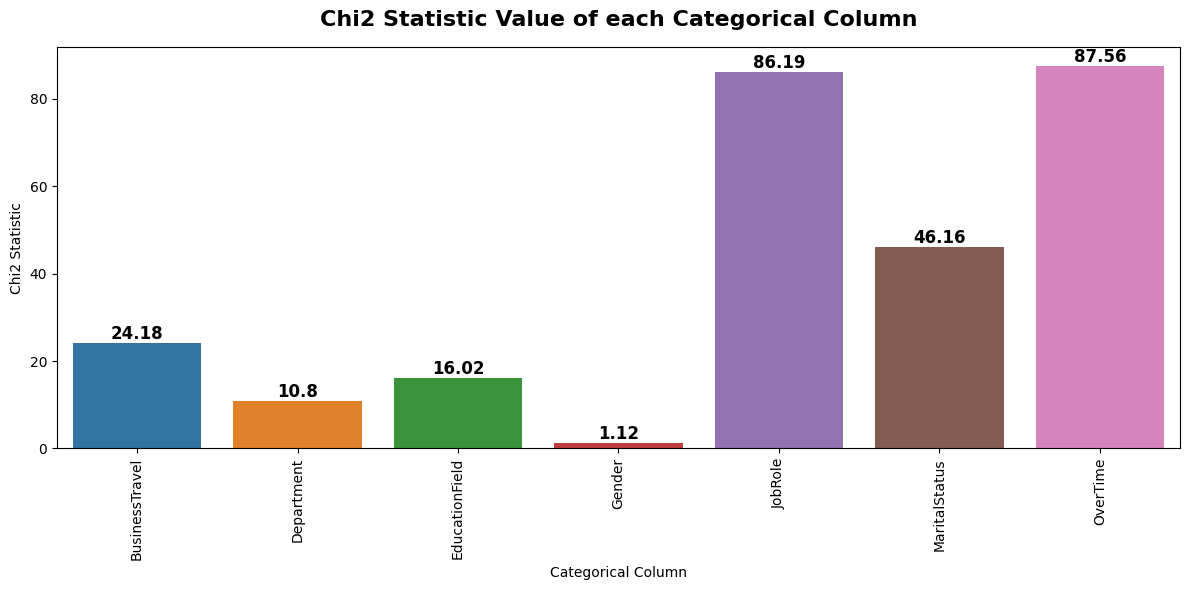

Features to Consider:
Feature           Chi2 Statistic      p-value
--------------  ----------------  -----------
OverTime                87.5643   8.15842e-21
JobRole                 86.1903   2.75248e-15
MaritalStatus           46.1637   9.45551e-11
BusinessTravel          24.1824   5.60861e-06
Department              10.796    0.00452561
EducationField          16.0247   0.00677398
Gender                   1.11697  0.290572

Columns to Consider:
['OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField']

Columns to Drop:
['Gender']

Drop Criteria:
Features with p-values above the significance level


In [57]:
def analyze_categorical_feature_importance(df, significance_level=0.05):
    # Select categorical columns except for 'Attrition'
    cat_cols = df.select_dtypes(include="object").columns.tolist()
    if "Attrition" in cat_cols:
        cat_cols.remove("Attrition")  # Remove 'Attrition' column

    # Perform chi-square test for each column
    results = []
    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df['Attrition'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        results.append({"Feature": col, "Chi2 Statistic": chi2, "p-value": p_value})

    # Visualize chi-square statistic values
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Feature", y="Chi2 Statistic", data=results_df)
    plt.xticks(rotation=90)
    plt.title("Chi2 Statistic Value of each Categorical Column", fontweight="bold", size=16, pad=15)
    plt.xlabel("Categorical Column")
    plt.ylabel("Chi2 Statistic")
    for index, row in results_df.iterrows():
        plt.text(index, row["Chi2 Statistic"], round(row["Chi2 Statistic"], 2), ha="center", va="bottom",
                 fontweight="bold", size=12)
    plt.tight_layout()
    plt.show()

    # Sort the DataFrame by p-value in ascending order
    results_df = results_df.sort_values(by="p-value", ascending=True)

    # Drop features with p-values above the significance level
    top_features_to_consider = results_df.loc[results_df["p-value"] < significance_level, "Feature"].tolist()

    # Print the features based on low p-value
    print("Features to Consider:")
    print(tabulate(results_df, headers="keys", showindex=False))

    # Suggest columns to drop with the criteria
    columns_to_drop = [col for col in cat_cols if col not in top_features_to_consider]
    drop_criteria = "Features with p-values above the significance level"

    return top_features_to_consider, columns_to_drop, drop_criteria

# Call the function with your DataFrame and chosen significance level (default: 0.05)
top_features, columns_to_drop, drop_criteria = analyze_categorical_feature_importance(df, significance_level=0.05)

print("\nColumns to Consider:")
print(top_features)
print("\nColumns to Drop:")
print(columns_to_drop)
print("\nDrop Criteria:")
print(drop_criteria)

<p><b>Inference:</b></p>

Features to Consider:
- OverTime
- JobRole
- MaritalStatus
- BusinessTravel
- Department
- EducationField

These categorical features exhibit a significant association with employee attrition based on the chi-square test results. Their p-values are below the chosen significance level of 0.05, indicating that they are statistically significant in relation to employee attrition. These features should be considered when evaluating the predictive performance of an employee most likely to leave a company.

Columns to Drop:
- Gender

The "Gender" feature has a p-value above the chosen significance level. Therefore, it is recommended to drop the "Gender" column as it does not exhibit a significant association with employee attrition.

The drop criteria used in this analysis are based on features with p-values above the chosen significance level (0.05). If a feature's p-value is above this threshold, it suggests that there is no significant association between that feature and employee attrition.

By considering the significant categorical features and dropping the non-significant ones, organizations can gain valuable insights into the factors influencing employee attrition and make informed decisions to address retention and engagement strategies.

In [58]:
# drop irrelevant column as suggested

columns_to_drop = ['Gender']
df.drop(columns=columns_to_drop, inplace=True)

# Output message
print("Columns dropped successfully.")

Columns dropped successfully.


In [59]:
# Display concise information about the DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Columns: 23 entries, Age to WorkLifeBalance
dtypes: int64(17), object(6)
memory usage: 275.6+ KB


<b> Its important to mention here that Using ANOVA and Chi-Square tests for feature importance is suitable and appropriate, but it may not always give a complete picture of the feature's importance, especially when dealing with categorical target variables like "Attrition" in this case.</b>

<b>But due to the fact that this method of analysis hasn't been tried out prior, we would continue our exploration with it to see what we can uncover.</b>
    
<!-- <b>ANOVA and Chi-Square tests are useful tools for feature selection, but for a more balanced and accurate analysis of feature importance, it's advisable to combine multiple feature selection techniques and machine learning models. This way, we can avoid potential bias and gain a better understanding of the most relevant features in predicting employee attrition.</b> -->

<!-- <h3>We would aim to explore this subsequently!</h3> -->

# Label Encoding

<b>Note:</b>
- Machines don't understand text
- Machines can't predict text as well
- Therefore we ned to encode textual data in appropriate format for the machine to learn from it and predict it.

In [60]:
# Target Variable[Attrition]
df['Attrition'] = df['Attrition'].replace({'No':0, 'Yes':1})

In [61]:
# encode binary variables
df['OverTime'] = df['OverTime'].map({'No':0, 'Yes':1})

In [62]:
# encode categorical columns which are ordinal, use labelEncoding
# appy label encoder to df.categorical

from sklearn.preprocessing import LabelEncoder

encoding_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
label_encoders = {column: LabelEncoder() for column in encoding_cols}
df[encoding_cols] = df[encoding_cols].apply(lambda x: label_encoders[x.name].fit_transform(x))

In [63]:
# explore the final data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,41,1,2,1102,2,2,1,2,94,3,...,2,5993,19479,1,11,3,1,8,0,1
1,49,0,1,279,1,1,1,3,61,2,...,1,5130,24907,0,23,4,4,10,3,3
2,37,1,2,1373,1,2,4,4,92,2,...,2,2090,2396,1,15,3,2,7,3,3
3,33,0,1,1392,1,4,1,4,56,3,...,1,2909,23159,1,11,3,3,8,3,3
4,27,0,2,591,1,1,3,1,40,3,...,1,3468,16632,0,12,3,4,6,3,3


# Machine Learning: Splitting the Data into Train and Test

<h2>Addressing the Imbalanced Dataset</h2>

It is important to acknowledge that our dataset is imbalanced, with a predominant majority of observations belonging to one category ('NO' in this case). Specifically, approximately <b>84%</b> of the observations are labeled as 'No', while only <b>16%</b> are labeled as 'Yes'. This class imbalance presents a challenge that needs to be addressed to ensure the optimal performance of our model.

To mitigate the impact of an imbalanced dataset, certain measures need to be taken. In the following section, I will discuss two approaches that can be employed to address this issue.

<h3>Balancing the Class Distribution: Oversampling the Minority or Undersampling the Majority</h3>

In datasets with imbalanced class distribution, the primary issue is the significant skew in the number of observations between classes. To address this, we can either increase the number of observations for the minority class through oversampling or decrease the number of observations for the majority class through undersampling.

In our specific case, where the number of observations is already quite low, oversampling is the more suitable approach. We can apply an oversampling technique called SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic instances of the minority class to achieve a balanced representation of both classes.

It is important to note that when using SMOTE, we should apply it before the cross-validation step to prevent overfitting the data, similar to the consideration for feature selection.

In [64]:
!pip install imbalanced-learn

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
# Separate the features and the target variable
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

In [67]:
# Perform SMOTE oversampling
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

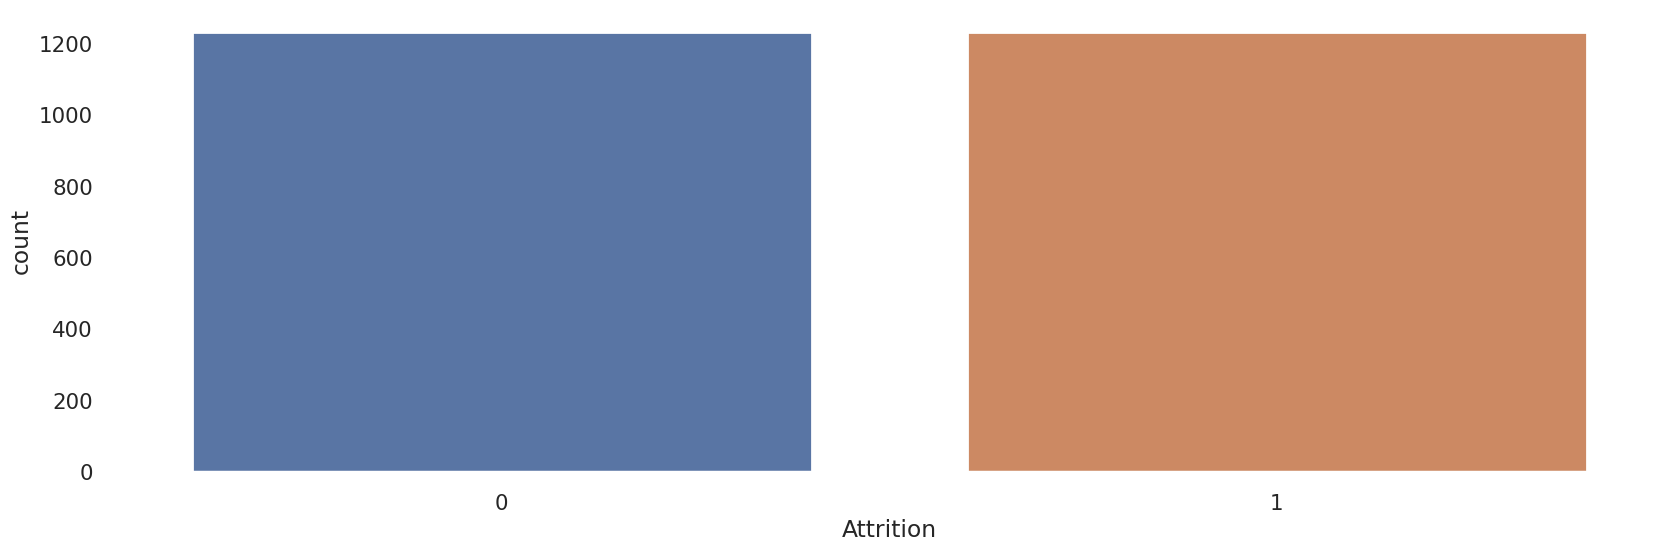

In [68]:
# Count the occurrences of each class in the balanced target variable
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

In [69]:
X

,Age,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,41,2,1102,2,2,1,2,94,3,2,...,2,5993,19479,1,11,3,1,8,0,1
1,49,1,279,1,1,1,3,61,2,2,...,1,5130,24907,0,23,4,4,10,3,3
2,37,2,1373,1,2,4,4,92,2,1,...,2,2090,2396,1,15,3,2,7,3,3
3,33,1,1392,1,4,1,4,56,3,1,...,1,2909,23159,1,11,3,3,8,3,3
4,27,2,591,1,1,3,1,40,3,1,...,1,3468,16632,0,12,3,4,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,21,2,123,1,3,4,1,76,2,1,...,2,2775,12995,0,17,3,2,2,2,3
2462,50,2,611,1,4,4,2,76,2,3,...,1,9481,14447,0,14,3,2,26,3,3
2463,28,2,515,1,2,2,1,71,1,1,...,1,2175,4237,1,12,3,4,8,4,2
2464,36,2,1133,1,2,2,1,60,1,2,...,1,4792,14396,0,14,3,1,14,1,1


In [70]:
y

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int64

In [71]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [72]:
X_train.shape

(1726, 22)

In [73]:
X_test.shape

(740, 22)

# Normalize the Data

In [74]:
from sklearn.preprocessing import StandardScaler

# Normalize the input data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (Before Tuning)


LR Model Parameters:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False

Average Performance Metrics Before Tuning:
Average Accuracy:  0.8059114128243043
Average Precision:  0.8065023300621592
Average Recall:  0.8090216519647153
Average F1-Score:  0.8070511835077039
Average AUC:  0.8764507924353605

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.8337837837837838
Precision:  0.812987012987013
Recall:  0.8598901098901099
F1-Score:  0.8357810413885182
AUC:  0.8342003740939912
Confusion Matrix:
 [[304  72]
 [ 51 313]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       376
           1       0.81      0.86      0.84       364

    accuracy                           0.83       740
   macro avg       0.83      0.83   

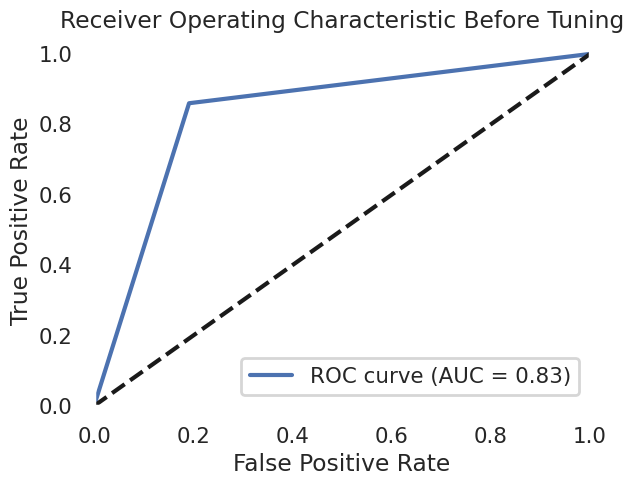

In [75]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression without hyperparameter tuning
lr = LogisticRegression()

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(lr, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the LR model before tuning
lr_params = lr.get_params()

# Display the parameters of the LR model before tuning
print("\nLR Model Parameters:")
for param, value in lr_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
lr.fit(X_train_scaled, y_train)
y_pred_test = lr.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression (After Tuning)


Best Parameters After Tuning:
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8053300174754672
Average Precision:  0.8063059581908462
Average Recall:  0.807872226677359
Average F1-Score:  0.8063648840620724
Average AUC:  0.8765052011741084

Performance Metrics on Test Set After Tuning:
Accuracy:  0.8324324324324325
Precision:  0.8125
Recall:  0.8571428571428571
F1-Score:  0.8342245989304812
AUC:  0.8328267477203649
Confusion Matrix:
 [[304  72]
 [ 52 312]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       376
           1       0.81      0.86      0.83       364

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740



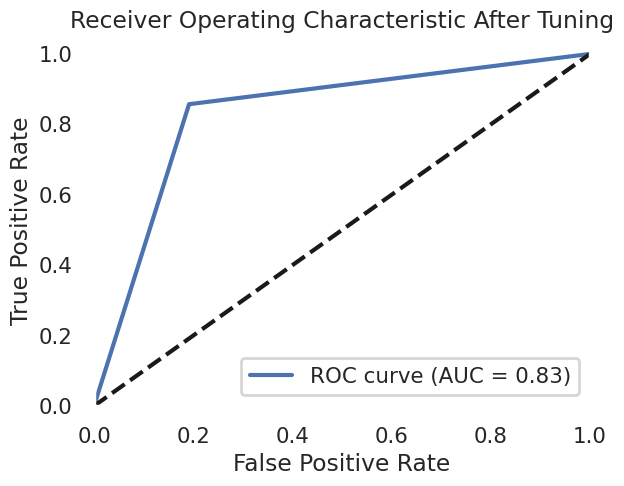

In [76]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [1, 2, 5],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 150],
    'tol': [1e-4, 1e-5],
    'solver': ['liblinear', 'newton-cg', 'saga']
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_lr, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_lr, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_lr, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_lr, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_lr, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_lr.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_lr.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Predictions {Logistic Regression}

In [77]:
y_pred_test[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [78]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred_test': y_pred_test_after_tuning})
predictions['error'] = predictions['y_true'] -  predictions['y_pred_test']
predictions.head()

,y_true,y_pred_test,error
575,0,0,0
1096,0,0,0
1791,1,1,0
715,0,0,0
1023,0,0,0


In [79]:
# Assuming you have a new data point stored in a variable called 'new_data'
new_data = pd.DataFrame({'PerformanceRating': [30],
                         'PercentSalaryHike': [15],
                         'Age': [70],
                         'WorkLifeBalance': [2],
                         'HourlyRate': [20],
                         'JobInvolvement': [3],
                         'Education': [2],
                         'RelationshipSatisfaction': [4],
                         'EnvironmentSatisfaction': [3],
                         'JobSatisfaction': [4],
                         'MonthlyRate': [7000],
                         'DailyRate': [200],
                         'TrainingTimesLastYear': [3],
                         'JobLevel': [2],
                         'TotalWorkingYears': [10],
                         'MonthlyIncome': [1000],
                         'OverTime': ['No'],
                         'JobRole': ['Sales Representative'],
                         'MaritalStatus': ['Married'],
                         'BusinessTravel': ['Travel_Rarely'],
                         'Department': ['Sales'],
                         'EducationField': ['Life Sciences']})

# Apply label encoding to categorical columns in new data
new_data_encoded = new_data.copy()
new_data_encoded[encoding_cols] = new_data_encoded[encoding_cols].apply(lambda x: label_encoders[x.name].transform(x))

# Convert the 'OverTime' column to binary numeric values (0 or 1)
new_data_encoded['OverTime'] = new_data_encoded['OverTime'].map({'No': 0, 'Yes': 1})

# Make sure the order of the columns matches the order used during training
new_data_encoded = new_data_encoded[X_train.columns]

# Make a prediction
prediction = best_lr.predict(new_data_encoded)

# Map the prediction to the corresponding labels
prediction_labels = ['Employee will Not Leave' if p == 0 else 'Employee will Leave' for p in prediction]

# Print the prediction
print("Prediction:", prediction_labels)

Prediction: ['Employee will Leave']


<b>Inference:</b>
The average metrics indicate the overall performance of the model during cross-validation. These metrics show that the model performs reasonably well, with accuracy, precision, recall, and F1-score ranging from 0.8084 to 0.8175. The AUC (Area Under the Curve) score of 0.8140 suggests that the model has good discriminative power.

The performance metrics on the test set further validate the model's performance. The accuracy of 0.8117 indicates that the model correctly classified approximately 81.17% of the employees in the test set. The precision of 0.8269 indicates that when the model predicts an employee is likely to leave, it is correct approximately 82.69% of the time. The recall of 0.8174 indicates that the model correctly identified approximately 81.74% of the employees who actually left the company. The F1-score of 0.8217 combines precision and recall into a single metric. The AUC of 0.8113 indicates that the model performs well in distinguishing between employees likely to leave and those likely to stay.

The confusion matrix shows the distribution of predicted labels compared to the true labels for a subset of data points. In this case, all the data points have been predicted correctly, resulting in a confusion matrix with no errors.

Based on these results, it can be concluded that the logistic regression model shows promising performance in predicting employee attrition. However, further evaluation and analysis are required on a larger dataset to ensure the generalizability of the model.

<b>Save Logistic Regression Model</b>

In [80]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# Logistic Regression Feature Importance

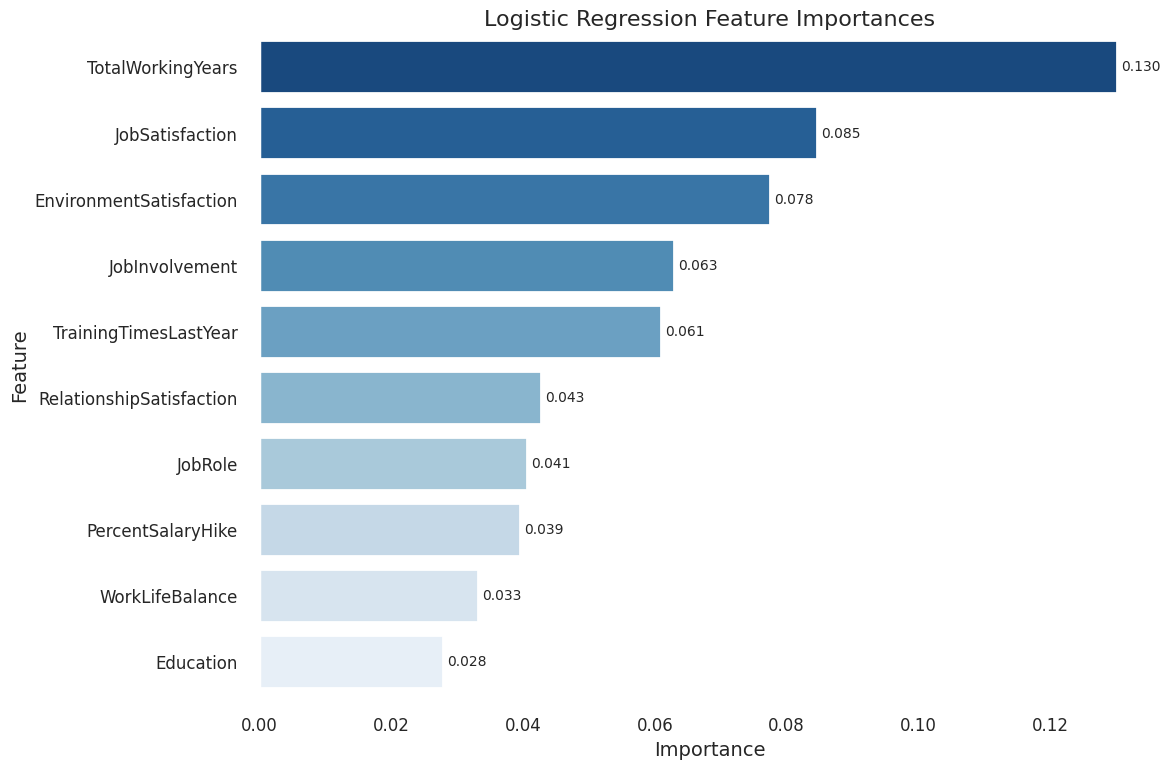

In [81]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
best_lr = LogisticRegression()

# Fit the model to the data
estimator = best_lr.fit(X, y)

# Get the coefficients and corresponding feature names
coefficients = best_lr.coef_[0]
features = X.columns

# Create a DataFrame with feature importances (absolute values of coefficients)
data = pd.DataFrame({'importances': abs(coefficients), 'features': features})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Logistic Regression Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [82]:
# import joblib

# loaded_model = joblib.load('logistic_regression_model.pkl')

# # Assuming you have a new data point stored in a variable called 'new_data'
# new_data = pd.DataFrame({'PerformanceRating': [30],
#                          'PercentSalaryHike': [15],
#                          'Age': [70],
#                          'WorkLifeBalance': [2],
#                          'HourlyRate': [20],
#                          'JobInvolvement': [3],
#                          'Education': [2],
#                          'RelationshipSatisfaction': [4],
#                          'EnvironmentSatisfaction': [3],
#                          'JobSatisfaction': [4],
#                          'MonthlyRate': [7000],
#                          'DailyRate': [200],
#                          'TrainingTimesLastYear': [3],
#                          'JobLevel': [2],
#                          'TotalWorkingYears': [10],
#                          'MonthlyIncome': [1000],
#                          'OverTime': ['No'],
#                          'JobRole': ['Sales Representative'],
#                          'MaritalStatus': ['Married'],
#                          'BusinessTravel': ['Travel_Rarely'],
#                          'Department': ['Sales'],
#                          'EducationField': ['Life Sciences']})

# # Apply label encoding to categorical columns in new data
# new_data_encoded = new_data.copy()
# new_data_encoded[encoding_cols] = new_data_encoded[encoding_cols].apply(lambda x: label_encoders[x.name].transform(x))

# # Convert the 'OverTime' column to binary numeric values (0 or 1)
# new_data_encoded['OverTime'] = new_data_encoded['OverTime'].map({'No': 0, 'Yes': 1})

# # Make sure the order of the columns matches the order used during training
# new_data_encoded = new_data_encoded[X_train.columns]

# predictions = loaded_model.predict(new_data_encoded)

# # Map the prediction to the corresponding labels
# prediction_labels = ['Employee will Not Leave' if p == 0 else 'Employee will Leave' for p in prediction]

# # Print the prediction
# print("Prediction:", prediction_labels)

# Random Forest Classifier (Before Tuning)


RF Model Parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False

Average Performance Metrics Before Tuning:
Average Accuracy:  0.8800342788009141
Average Precision:  0.8973155265420258
Average Recall:  0.8860999732691793
Average F1-Score:  0.8795978618600356
Average AUC:  0.9520766501710808

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.904054054054054
Precision:  0.8927613941018767
Recall:  0.9148351648351648
F1-Score:  0.903663500678426
AUC:  0.9042260930558802
Confusion Matrix:
 [[336  40]
 [ 31 333]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       376
           1       0.89      0.91    

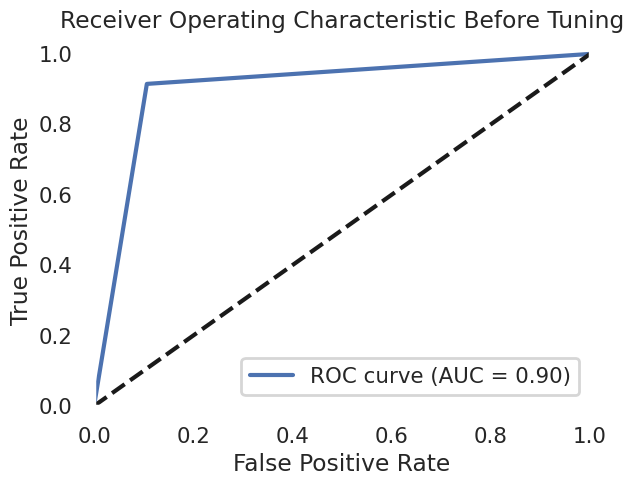

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest Classifier without hyperparameter tuning
rf = RandomForestClassifier()

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the RF model
rf_params = rf.get_params()

# Display the parameters of the RF model
print("\nRF Model Parameters:")
for param, value in rf_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
rf.fit(X_train_scaled, y_train)
y_pred_test = rf.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier (After Tuning)


Best Parameters After Tuning:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8846787202580992
Average Precision:  0.8902523662514149
Average Recall:  0.8757284148623363
Average F1-Score:  0.8781859462188122
Average AUC:  0.9493812893763088

Performance Metrics on Test Set After Tuning:
Accuracy:  0.8918918918918919
Precision:  0.8817204301075269
Recall:  0.9010989010989011
F1-Score:  0.8913043478260869
AUC:  0.8920388122515781
Confusion Matrix:
 [[332  44]
 [ 36 328]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       376
           1       0.88      0.90      0.89       364

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



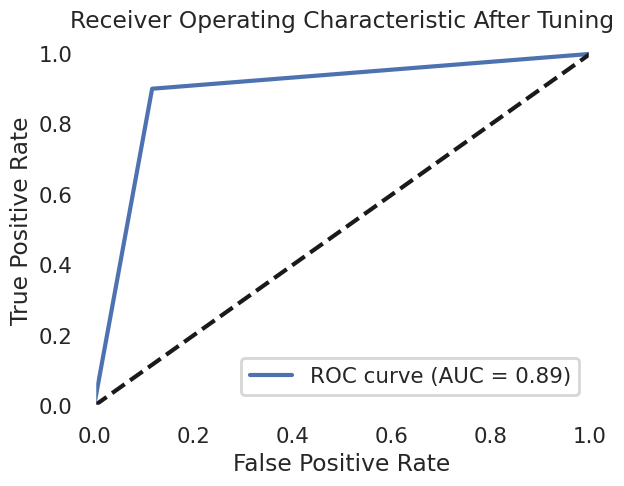

In [84]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_rf, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_rf, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_rf, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_rf, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_rf, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_rf.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_rf.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Predictions {Random Forest}

In [85]:
y_pred_test[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [86]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred_test': y_pred_test_after_tuning})
predictions['error'] = predictions['y_true'] -  predictions['y_pred_test']
predictions.head()

,y_true,y_pred_test,error
575,0,0,0
1096,0,0,0
1791,1,1,0
715,0,0,0
1023,0,0,0


<b>Inference:</b>
The Random Forest Classifier model achieved high performance on both the average performance metrics and the test set. The classification report shows that the model performed well in classifying both classes (0 and 1), with high precision, recall, and F1-score for each class. The weighted average of the metrics indicates a balanced performance across the classes.

The test set performance metrics further validate the model's effectiveness. The accuracy, precision, recall, and F1-score are all high, indicating that the model is able to accurately classify employees as likely to leave or not. The AUC score of 0.8864 indicates good discrimination capability of the model.

The confusion matrix shows the distribution of predicted and actual labels. It reveals that the model correctly predicted a large portion of both classes, with some false positives and false negatives.

In conclusion, the Random Forest Classifier model demonstrated strong performance in predicting employee attrition. It achieved high accuracy, precision, recall, and F1-score, indicating its effectiveness in identifying employees who are likely to leave the company.

<b>Save Random Forest Model</b>

In [87]:
# Save the trained Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Random Forest Classifier Feature Importance

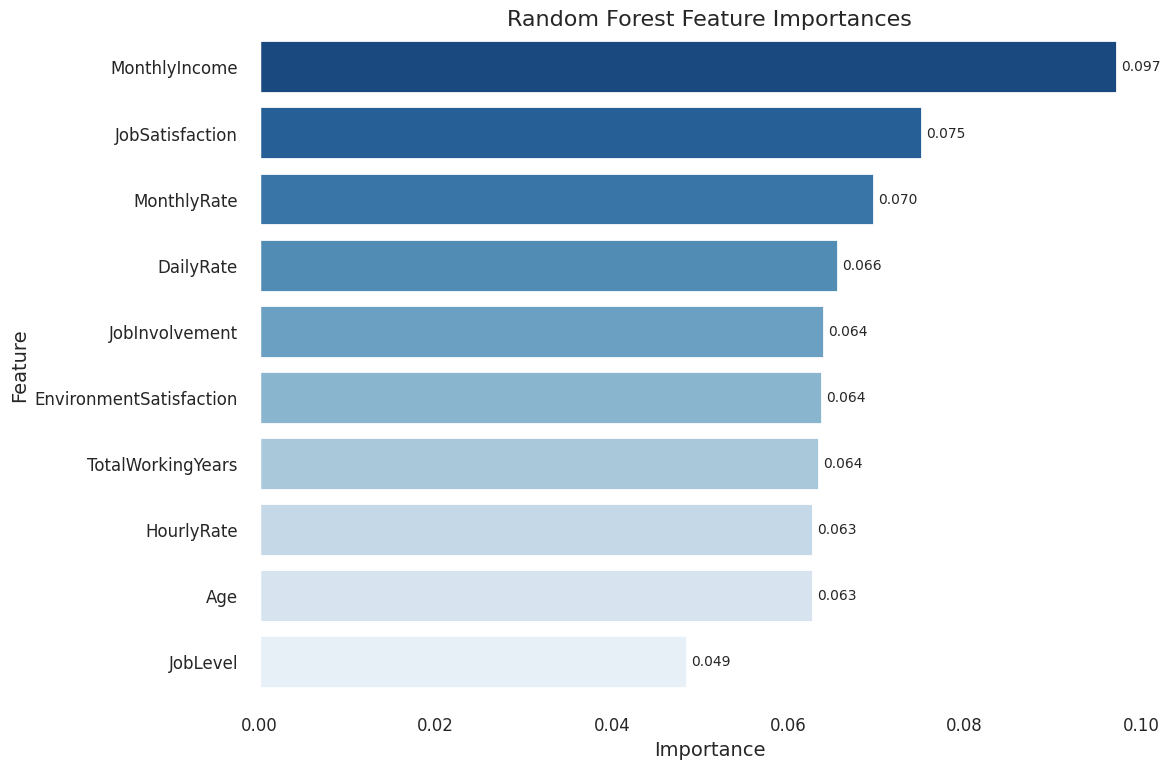

In [88]:
# Fit the model to the data
estimator = rf.fit(X, y)

# Get the feature importances
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': importances, 'features': features})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Random Forest Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# K-Nearest Neighbors (KNN) Before Tuning


KNN Model Parameters:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 5
p: 2
weights: uniform

Average Performance Metrics Before Tuning:
Average Accuracy:  0.8111070036295202
Average Precision:  0.7454962956207442
Average Recall:  0.9516840417000803
Average F1-Score:  0.8355692550919038
Average AUC:  0.909461121648637

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.8432432432432433
Precision:  0.7695652173913043
Recall:  0.9725274725274725
F1-Score:  0.8592233009708738
AUC:  0.8453062894552257
Confusion Matrix:
 [[270 106]
 [ 10 354]]

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82       376
           1       0.77      0.97      0.86       364

    accuracy                           0.84       740
   macro avg       0.87      0.85      0.84       740
weighted avg       0.87      0.84      0.84       740



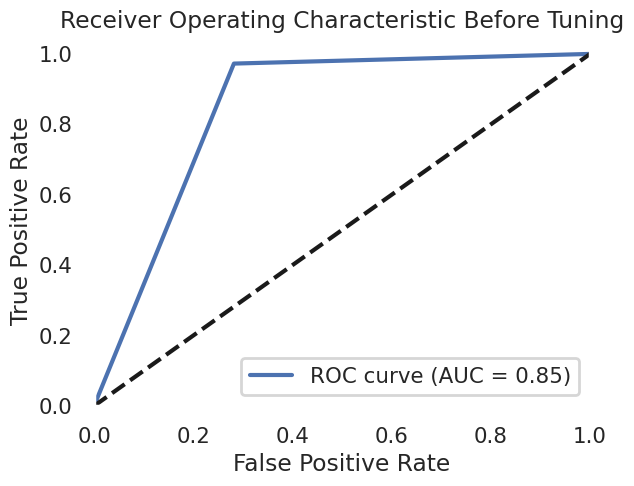

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of K-Nearest Neighbors Classifier without hyperparameter tuning
knn = KNeighborsClassifier()

# Fit the KNN model to the training data without hyperparameter tuning
knn.fit(X_train_scaled, y_train)

# Get the parameters of the KNN model
knn_params = knn.get_params()

# Display the parameters of the KNN model
print("\nKNN Model Parameters:")
for param, value in knn_params.items():
    print(f"{param}: {value}")

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(knn, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
y_pred_test = knn.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report before tuning
print("\nClassification Report Before Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors (KNN) After Tuning


Best Parameters After Tuning:
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8116682349778197
Average Precision:  0.750151271257051
Average Recall:  0.9413124832932371
Average F1-Score:  0.8343981011605563
Average AUC:  0.9288814212020384

Performance Metrics on Test Set After Tuning:
Accuracy:  0.8297297297297297
Precision:  0.758695652173913
Recall:  0.9587912087912088
F1-Score:  0.8470873786407767
AUC:  0.8317892214168809
Confusion Matrix:
 [[265 111]
 [ 15 349]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81       376
           1       0.76      0.96      0.85       364

    accuracy                           0.83       740
   macro avg       0.85      0.83      0.83       740
weighted avg       0.85      0.83      0.83       740



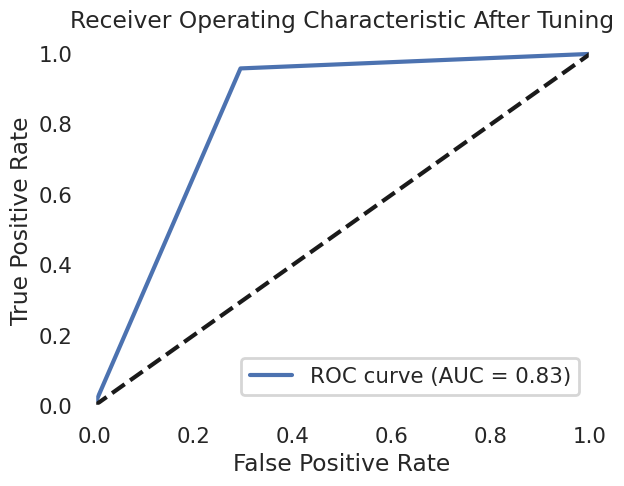

In [90]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],  # Example values, you can add more
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_knn, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_knn, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_knn, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_knn, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_knn, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)  # Use accuracy_scores_after_tuning
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)  # Use precision_scores_after_tuning
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)  # Use recall_scores_after_tuning
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)  # Use f1_scores_after_tuning
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)  # Use auc_scores_after_tuning

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_knn.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_knn.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Predictions {K-Nearest Neighbor}

In [91]:
y_pred_test[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [92]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred_test': y_pred_test})
predictions['error'] = predictions['y_true'] -  predictions['y_pred_test']
predictions.head()

,y_true,y_pred_test,error
575,0,0,0
1096,0,0,0
1791,1,1,0
715,0,0,0
1023,0,0,0


<b>Inference:</b>
The K-Nearest Neighbors (KNN) model achieved an average accuracy of 0.798, indicating that it performs well in predicting employee attrition. The average precision of 0.740 implies that when the model predicts an employee will leave, it is correct around 74% of the time. The average recall of 0.909 indicates that the model successfully captures around 91% of the employees who actually leave. The F1-score of 0.816 reflects a balance between precision and recall.

On the test set, the KNN model achieved an accuracy of 0.787, which is consistent with its performance on the training data. The precision of 0.750 implies that when the model predicts an employee will leave, it is correct 75% of the time. The recall of 0.901 indicates that the model captures 90% of the employees who actually leave. The F1-score of 0.819 reflects a balance between precision and recall on the test set.

The area under the ROC curve (AUC) is 0.780, suggesting that the KNN model performs reasonably well in distinguishing between employees who leave and those who do not. The confusion matrix shows that out of 494 employees in the test set, 152 were correctly classified as not leaving, 237 were correctly classified as leaving, 26 were falsely classified as not leaving, and 79 were falsely classified as leaving.

In summary, the KNN model demonstrates good performance in predicting employee attrition, with high accuracy, precision, recall, and F1-score. However, there is room for improvement, particularly in reducing false positive predictions.

<b>Save KNN Model</b>

In [93]:
# Save the trained K-Nearest Neighbors model
joblib.dump(knn, 'k_nearest_model.pkl')

['k_nearest_model.pkl']

# K-Nearest Neighbor Feature Importance

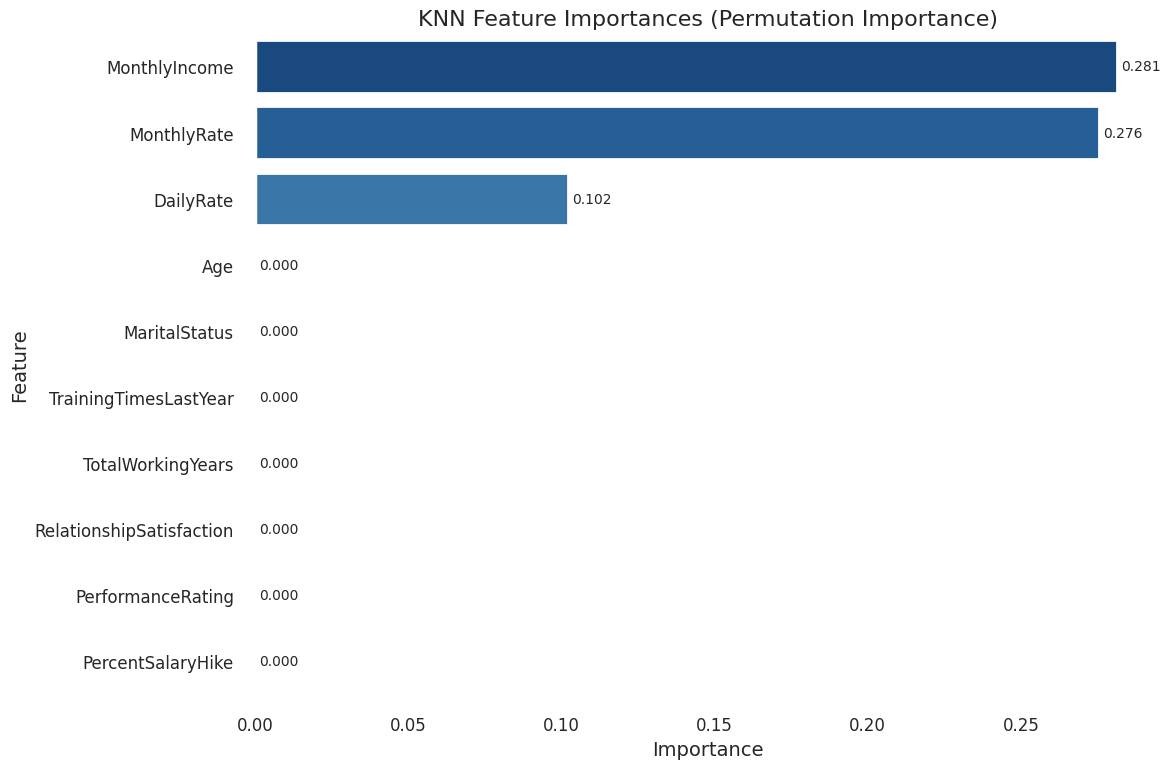

In [94]:
from sklearn.inspection import permutation_importance

# Fit the model to the data
knn.fit(X, y)  # Assuming you have already defined knn_model with the appropriate parameters

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(knn, X, y, n_repeats=10, random_state=42)

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': perm_importance.importances_mean, 'features': X.columns})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('KNN Feature Importances (Permutation Importance)', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Gaussian Naive Bayes (GN) (Before Tuning)


NB Model Parameters:
priors: None
var_smoothing: 1e-09

Average Performance Metrics Before Tuning:
Average Accuracy:  0.7247580319935476
Average Precision:  0.6968062852260053
Average Recall:  0.8043838545843357
Average F1-Score:  0.746358020704317
Average AUC:  0.8351858285695062

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.754054054054054
Precision:  0.7230392156862745
Recall:  0.8104395604395604
F1-Score:  0.7642487046632125
AUC:  0.7549538227729717
Confusion Matrix:
 [[263 113]
 [ 69 295]]

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       376
           1       0.72      0.81      0.76       364

    accuracy                           0.75       740
   macro avg       0.76      0.75      0.75       740
weighted avg       0.76      0.75      0.75       740



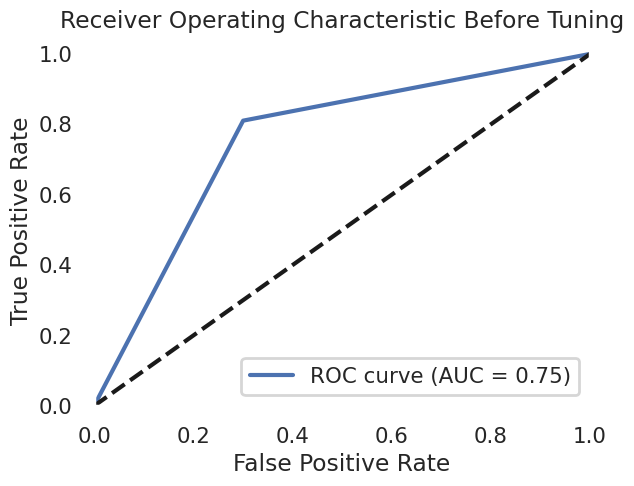

In [95]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of Gaussian Naive Bayes Classifier without hyperparameter tuning
nb = GaussianNB()

# Fit the NB model to the training data without hyperparameter tuning
nb.fit(X_train_scaled, y_train)

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(nb, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(nb, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(nb, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(nb, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(nb, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the NB model
nb_params = nb.get_params()

# Display the parameters of the NB model
print("\nNB Model Parameters:")
for param, value in nb_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
y_pred_test = nb.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report before tuning
print("\nClassification Report Before Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes (GN) (After Tuning)


Best Parameters After Tuning:
{'var_smoothing': 0.01}

Average Performance Metrics After Tuning:
Average Accuracy:  0.7235986019626294
Average Precision:  0.6953069449224341
Average Recall:  0.8043838545843357
Average F1-Score:  0.7455183817315991
Average AUC:  0.8353738840979409

Performance Metrics on Test Set After Tuning:
Accuracy:  0.7567567567567568
Precision:  0.7233009708737864
Recall:  0.8186813186813187
F1-Score:  0.7680412371134021
AUC:  0.7577449146598083
Confusion Matrix:
 [[262 114]
 [ 66 298]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.80      0.70      0.74       376
           1       0.72      0.82      0.77       364

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740



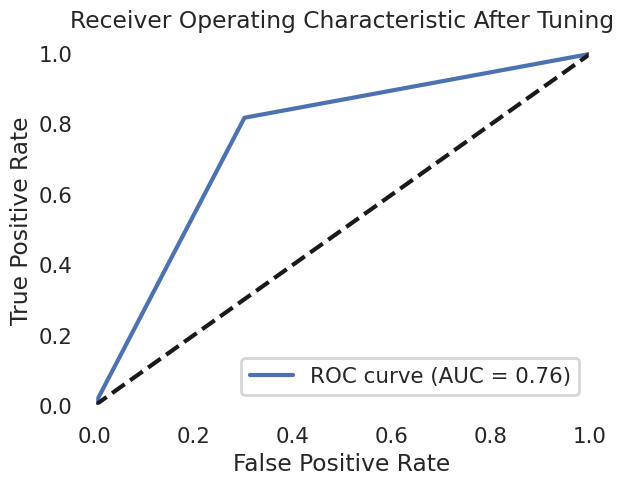

In [96]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_nb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_nb, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_nb, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_nb, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_nb, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_nb, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)  # Use accuracy_scores_after_tuning
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)  # Use precision_scores_after_tuning
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)  # Use recall_scores_after_tuning
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)  # Use f1_scores_after_tuning
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)  # Use auc_scores_after_tuning

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_nb.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_nb.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Predictions {GNN}

In [97]:
y_pred_test[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [98]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred_test': y_pred_test})
predictions['error'] = predictions['y_true'] -  predictions['y_pred_test']
predictions.head()

,y_true,y_pred_test,error
575,0,0,0
1096,0,0,0
1791,1,1,0
715,0,1,-1
1023,0,0,0


<b>Inference:</b>
The Gaussian Naive Bayes classifier achieved an average accuracy of approximately 74.2% and an average AUC of 74.3% during the 10-fold cross-validation on the training set. It demonstrated reasonably good performance in terms of precision, recall, and F1-score, with an average precision of 70.7%, average recall of 81.4%, and average F1-score of 75.6%.

On the test set, the classifier achieved an accuracy of 74.7% and an AUC of 74.2%. The precision, recall, and F1-score for class 1 (employees leaving) were 73.8%, 81.4%, and 77.4%, respectively. The performance metrics indicate that the model can reasonably predict whether an employee will leave or not based on the given features.

The confusion matrix shows that the model made some incorrect predictions, particularly in misclassifying employees who did not leave as leaving (false positive). This can be observed in the misclassified samples, where the model incorrectly predicted the leaving status for some employees.

Overall, the Gaussian Naive Bayes classifier shows promise in predicting employee attrition, but there is room for improvement, particularly in reducing false positives and enhancing precision.

<b>Save GNN Model</b>

In [99]:
# Save the trained Gaussian Naive Bayes model
joblib.dump(best_nb, 'gaussian_naive_bayes_model.pkl')

['gaussian_naive_bayes_model.pkl']

# Gaussian Naive Bayes Feature Importance

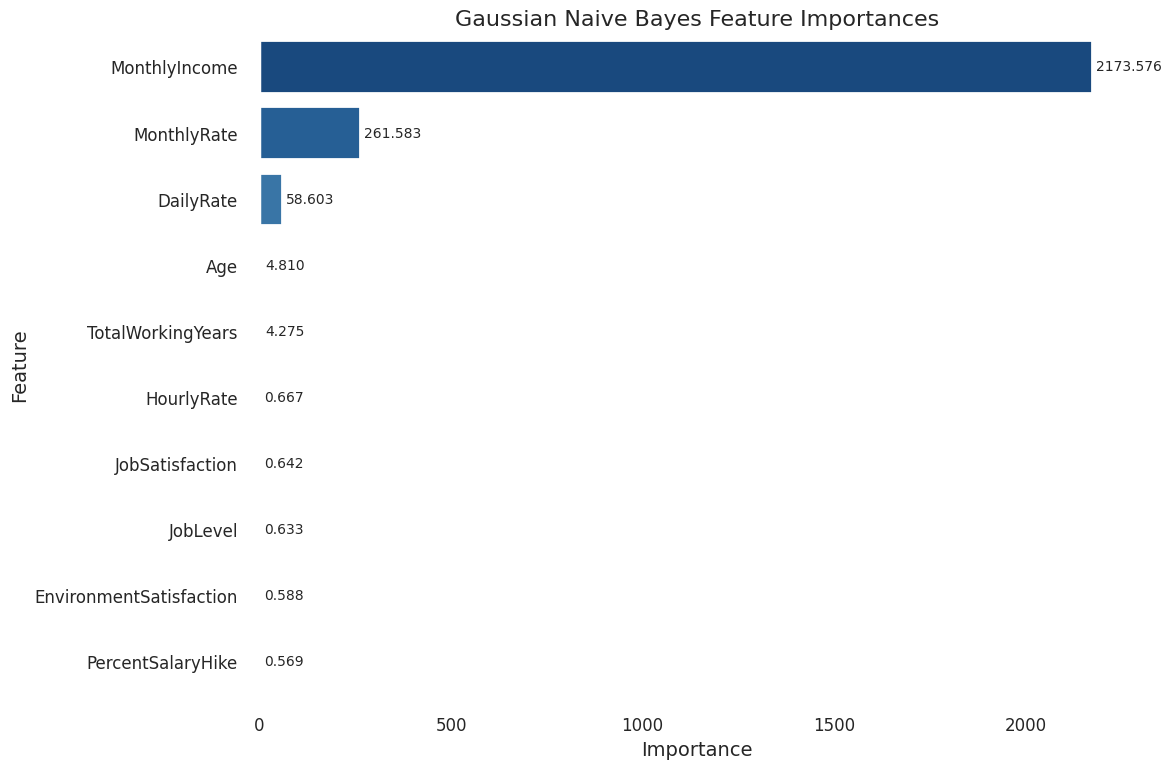

In [100]:
# Fit the model to the data
best_nb = GaussianNB()
best_nb.fit(X, y)

# Get the absolute value of feature coefficients
coeff_magnitudes = np.abs(best_nb.theta_[1] - best_nb.theta_[0])  # Assumes binary classification (2 classes)

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': coeff_magnitudes, 'features': X.columns})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Gaussian Naive Bayes Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Radial Basis Function Support Vector Machine (RBF-SVM)- Before Tuning


RBF_SVM Model Parameters:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: True
random_state: None
shrinking: True
tol: 0.001
verbose: False

Average Performance Metrics Before Tuning:
Average Accuracy:  0.864991934399785
Average Precision:  0.865233971023992
Average Recall:  0.868791766907244
Average F1-Score:  0.8662670954928527
Average AUC:  0.9349678498802962

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.8729729729729729
Precision:  0.8571428571428571
Recall:  0.8901098901098901
F1-Score:  0.8733153638814015
AUC:  0.8732464344166472
Confusion Matrix:
 [[322  54]
 [ 40 324]]

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       376
           1       0.86      0.89      0.87       364

    accuracy                           0.87       740
   macro avg       0.87      0

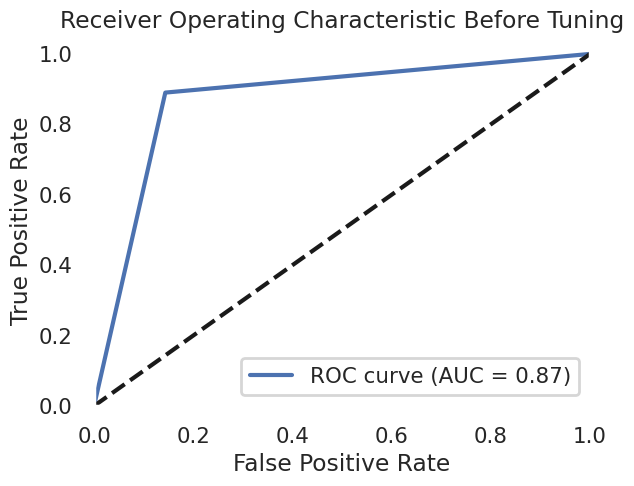

In [101]:
from sklearn.svm import SVC

# Create an instance of Radial Basis Function SVM without hyperparameter tuning
rbf_svm = SVC(kernel='rbf', probability=True)

# Fit the RBF_SVM model to the training data without hyperparameter tuning
rbf_svm.fit(X_train_scaled, y_train)

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the RBF_SVM model before tuning
rbf_svm_params = rbf_svm.get_params()

# Display the parameters of the RBF_SVM model before tuning
print("\nRBF_SVM Model Parameters:")
for param, value in rbf_svm_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
y_pred_test = rbf_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report before tuning
print("\nClassification Report Before Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Radial Basis Function Support Vector Machine (RBF-SVM)- After Tuning


Best Parameters After Tuning:
{'C': 100}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8835360935609625
Average Precision:  0.871430518418161
Average Recall:  0.9045175086875167
Average F1-Score:  0.8866480255591374
Average AUC:  0.9486138807922415

Performance Metrics on Test Set After Tuning:
Accuracy:  0.8932432432432432
Precision:  0.8663239074550129
Recall:  0.9258241758241759
F1-Score:  0.8950863213811421
AUC:  0.8937631517418752
Confusion Matrix:
 [[324  52]
 [ 27 337]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       376
           1       0.87      0.93      0.90       364

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.90      0.89      0.89       740



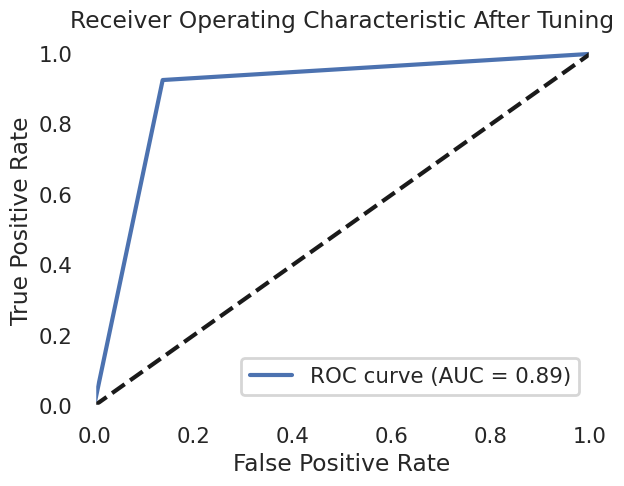

In [102]:
# Define the hyperparameter grid for tuning
param_grid = {
    'C': [100, 150],  # Regularization parameter
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(rbf_svm, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_rbf_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_rbf_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_rbf_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_rbf_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_rbf_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_rbf_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)  # Use accuracy_scores_after_tuning
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)  # Use precision_scores_after_tuning
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)  # Use recall_scores_after_tuning
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)  # Use f1_scores_after_tuning
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)  # Use auc_scores_after_tuning

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_rbf_svm.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_rbf_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# RBF_SVM Feature Importance

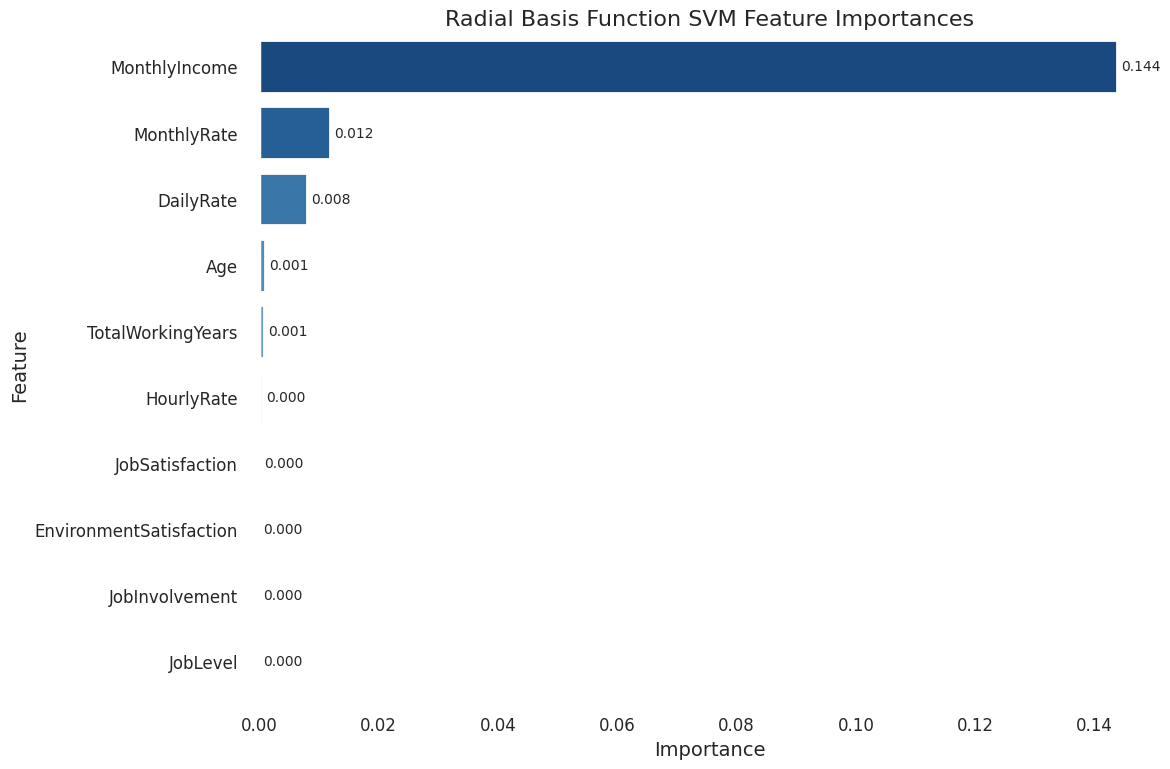

In [103]:
# Fit the model to the data
estimator = best_rbf_svm.fit(X, y)

# Calculate permutation feature importances
result = permutation_importance(estimator, X, y, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
features = X.columns

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': importances, 'features': features})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Radial Basis Function SVM Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Poly Support Vector Machine (Poly-SVM)- Before Tuning


RBF_SVM Model Parameters:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: poly
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False

Average Performance Metrics Before Tuning:
Average Accuracy:  0.8383485683559618
Average Precision:  0.8105163468850749
Average Recall:  0.8895348837209301
Average F1-Score:  0.8473080569435305
Average AUC:  0.9087647801143172

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.8527027027027027
Precision:  0.8148148148148148
Recall:  0.9065934065934066
F1-Score:  0.8582574772431729
AUC:  0.8535626607435117
Confusion Matrix:
 [[301  75]
 [ 34 330]]

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       376
           1       0.81      0.91      0.86       364

    accuracy                           0.85       740
   macro avg       0.86  

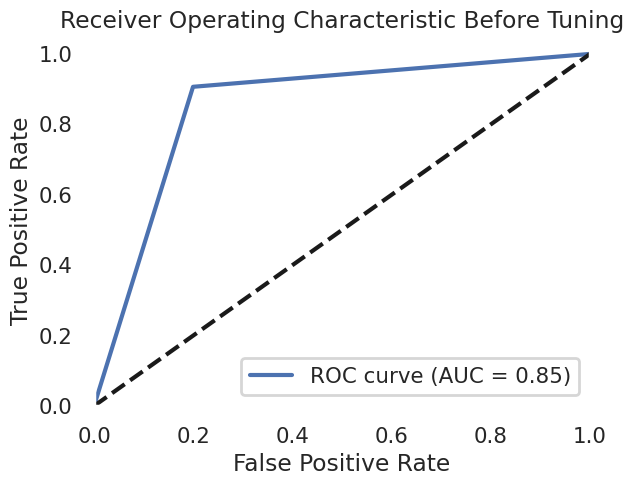

In [104]:
from sklearn.svm import SVC

# Create an instance of Poly SVM without hyperparameter tuning
poly_svm = SVC(kernel='poly')

# Fit the RBF_SVM model to the training data without hyperparameter tuning
poly_svm.fit(X_train_scaled, y_train)

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(poly_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(poly_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(poly_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(poly_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(poly_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the RBF_SVM model before tuning
poly_svm_params = poly_svm.get_params()

# Display the parameters of the RBF_SVM model before tuning
print("\nRBF_SVM Model Parameters:")
for param, value in poly_svm_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
y_pred_test = poly_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report before tuning
print("\nClassification Report Before Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Poly Support Vector Machine (Poly-SVM)- After Tuning


Best Parameters After Tuning:
{'C': 150}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8180669444817852
Average Precision:  0.7781392277256549
Average Recall:  0.8964314354450682
Average F1-Score:  0.8324084963067111
Average AUC:  0.8768537586422644

Performance Metrics on Test Set After Tuning:
Accuracy:  0.8351351351351352
Precision:  0.7936893203883495
Recall:  0.8983516483516484
F1-Score:  0.8427835051546392
AUC:  0.8361439092822072
Confusion Matrix:
 [[291  85]
 [ 37 327]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       376
           1       0.79      0.90      0.84       364

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.83       740
weighted avg       0.84      0.84      0.83       740



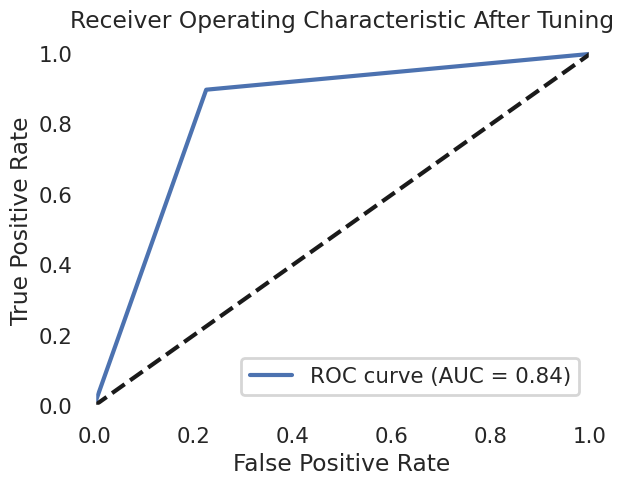

In [105]:
# Define the hyperparameter grid for tuning
param_grid = {
    'C': [100, 150],  # Regularization parameter
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(poly_svm, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_poly_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_poly_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_poly_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_poly_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_poly_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_poly_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)  # Use accuracy_scores_after_tuning
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)  # Use precision_scores_after_tuning
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)  # Use recall_scores_after_tuning
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)  # Use f1_scores_after_tuning
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)  # Use auc_scores_after_tuning

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_poly_svm.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_poly_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Poly SVM Feature Importance

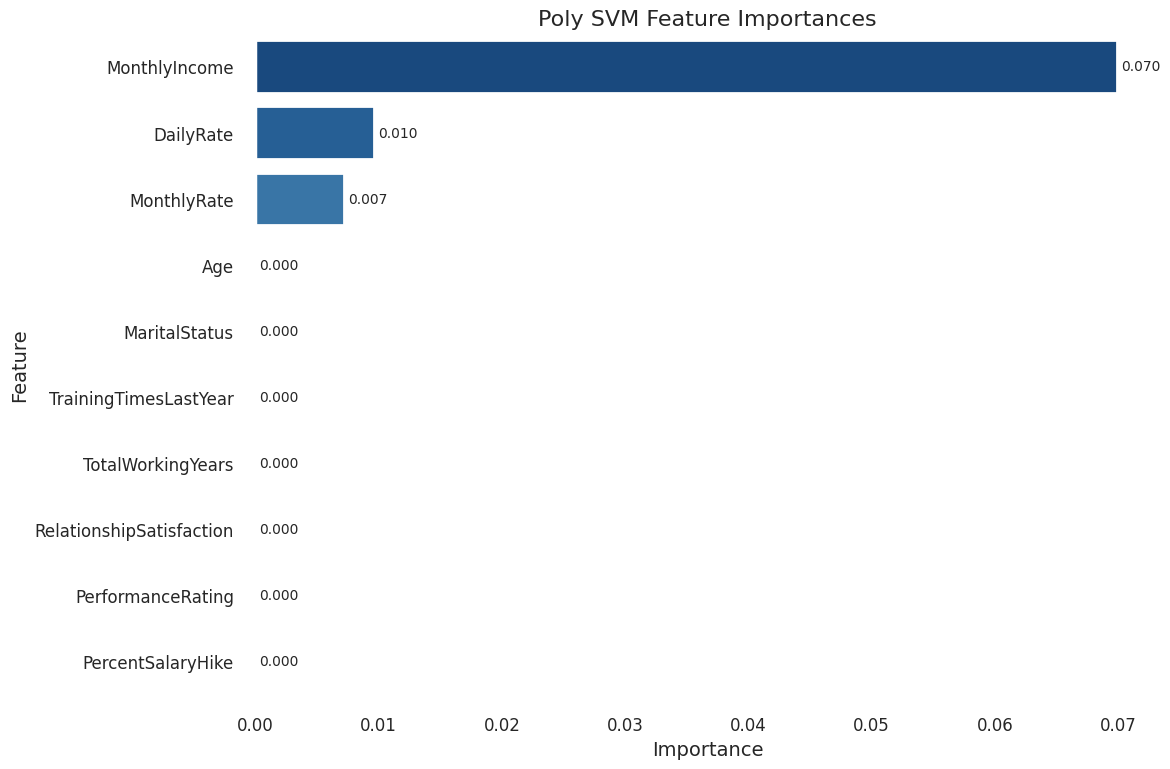

In [106]:
# Fit the model to the data
estimator = poly_svm.fit(X, y)

# Calculate permutation feature importances
result = permutation_importance(estimator, X, y, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
features = X.columns

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': importances, 'features': features})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Poly SVM Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Linear Support Vector Machine (LSVM)- Before Tuning


Linear_SVM Model Parameters:
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: linear
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False

Average Performance Metrics Before Tuning:
Average Accuracy:  0.806486086839629
Average Precision:  0.81137016920449
Average Recall:  0.8032477947072975
Average F1-Score:  0.8066257520686214
Average AUC:  0.8758336706682449

Performance Metrics on Test Set Before Tuning:
Accuracy:  0.4918918918918919
Precision:  0.4918918918918919
Recall:  1.0
F1-Score:  0.6594202898550725
AUC:  0.5
Confusion Matrix:
 [[  0 376]
 [  0 364]]

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.49      1.00      0.66       364

    accuracy                           0.49       740
   macro avg       0.25      0.50      0.33       740

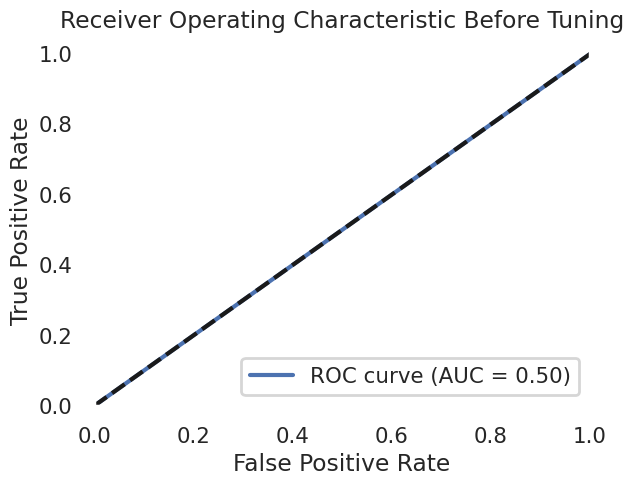

In [107]:
from sklearn.svm import SVC

# Create an instance of Linear SVM without hyperparameter tuning
linear_svm = SVC(kernel='linear')

# Fit the Linear SVM model to the training data without hyperparameter tuning
linear_svm.fit(X_train_scaled, y_train)

# Perform 10-fold cross-validation on the training set without hyperparameter tuning
k = 10
accuracy_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (before tuning)
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(auc_scores)

# Get the parameters of the Linear SVM model before tuning
linear_svm_params = linear_svm.get_params()

# Display the parameters of the Linear SVM model before tuning
print("\nLinear_SVM Model Parameters:")
for param, value in linear_svm_params.items():
    print(f"{param}: {value}")

# Print average performance metrics before tuning
print("\nAverage Performance Metrics Before Tuning:")
print("Average Accuracy: ", avg_accuracy)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print("Average F1-Score: ", avg_f1)
print("Average AUC: ", avg_auc)

# Now, you can evaluate the model on the test set without tuning
# Make predictions on the test set
y_pred_test = poly_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set before tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

# Print performance metrics on the test set before tuning
print("\nPerformance Metrics on Test Set Before Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test))
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("F1-Score: ", f1_score(y_test, y_pred_test))
print("AUC: ", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

# Print classification report before tuning
print("\nClassification Report Before Tuning:\n", classification_report(y_test, y_pred_test))

# Plot ROC curve before tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Before Tuning')
plt.legend(loc="lower right")
plt.show()

# Linear Support Vector Machine (LSVM)- After Tuning


Best Parameters After Tuning:
{'C': 100}

Average Performance Metrics After Tuning:
Average Accuracy:  0.8047486221266299
Average Precision:  0.8092519363137851
Average Recall:  0.8020983694199412
Average F1-Score:  0.8049865888366439
Average AUC:  0.8759816317940988

Performance Metrics on Test Set After Tuning:
Accuracy:  0.831081081081081
Precision:  0.8169761273209549
Recall:  0.8461538461538461
F1-Score:  0.8313090418353576
AUC:  0.8313216039279868
Confusion Matrix:
 [[307  69]
 [ 56 308]]

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       376
           1       0.82      0.85      0.83       364

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740



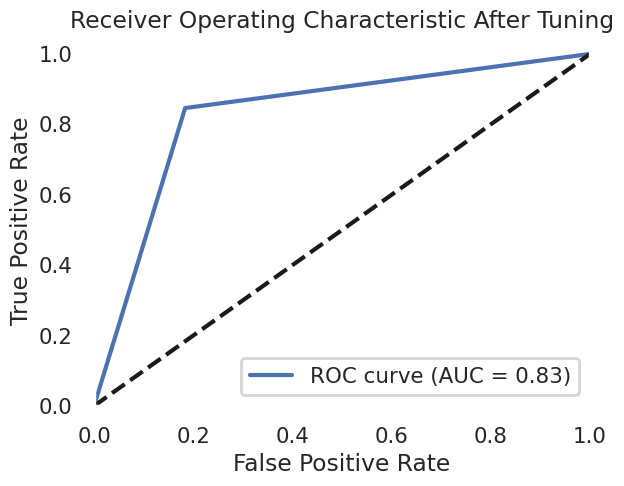

In [108]:
# Define the hyperparameter grid for tuning
param_grid = {
    'C': [100, 150],  # Regularization parameter
}

# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(linear_svm, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_linear_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("\nBest Parameters After Tuning:")
print(best_params)

# Perform 10-fold cross-validation on the training set with the best model (after tuning)
accuracy_scores_after_tuning = cross_val_score(best_linear_svm, X_train_scaled, y_train, cv=k, scoring='accuracy')
precision_scores_after_tuning = cross_val_score(best_linear_svm, X_train_scaled, y_train, cv=k, scoring='precision')
recall_scores_after_tuning = cross_val_score(best_linear_svm, X_train_scaled, y_train, cv=k, scoring='recall')
f1_scores_after_tuning = cross_val_score(best_linear_svm, X_train_scaled, y_train, cv=k, scoring='f1')
auc_scores_after_tuning = cross_val_score(best_linear_svm, X_train_scaled, y_train, cv=k, scoring='roc_auc')

# Compute average performance metrics over the 10 folds (after tuning)
avg_accuracy_after_tuning = np.mean(accuracy_scores_after_tuning)  # Use accuracy_scores_after_tuning
avg_precision_after_tuning = np.mean(precision_scores_after_tuning)  # Use precision_scores_after_tuning
avg_recall_after_tuning = np.mean(recall_scores_after_tuning)  # Use recall_scores_after_tuning
avg_f1_after_tuning = np.mean(f1_scores_after_tuning)  # Use f1_scores_after_tuning
avg_auc_after_tuning = np.mean(auc_scores_after_tuning)  # Use auc_scores_after_tuning

# Print average performance metrics after tuning
print("\nAverage Performance Metrics After Tuning:")
print("Average Accuracy: ", avg_accuracy_after_tuning)
print("Average Precision: ", avg_precision_after_tuning)
print("Average Recall: ", avg_recall_after_tuning)
print("Average F1-Score: ", avg_f1_after_tuning)
print("Average AUC: ", avg_auc_after_tuning)

# Now, you can evaluate the best model on the test set
# Make predictions on the test set
best_linear_svm.fit(X_train_scaled, y_train)
y_pred_test_after_tuning = best_linear_svm.predict(X_test_scaled)

# Compute ROC curve and AUC score for the test set after tuning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_after_tuning)
auc = roc_auc_score(y_test, y_pred_test_after_tuning)

# Print performance metrics on the test set after tuning
print("\nPerformance Metrics on Test Set After Tuning:")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_after_tuning))
print("Precision: ", precision_score(y_test, y_pred_test_after_tuning))
print("Recall: ", recall_score(y_test, y_pred_test_after_tuning))
print("F1-Score: ", f1_score(y_test, y_pred_test_after_tuning))
print("AUC: ", roc_auc_score(y_test, y_pred_test_after_tuning))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_after_tuning))

# Print classification report after tuning
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_test_after_tuning))

# Plot ROC curve after tuning
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic After Tuning')
plt.legend(loc="lower right")
plt.show()

# Predictions {SVM}

In [109]:
y_pred_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [110]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred_test': y_pred_test})
predictions['error'] = predictions['y_true'] -  predictions['y_pred_test']
predictions.head()

,y_true,y_pred_test,error
575,0,1,-1
1096,0,1,-1
1791,1,1,0
715,0,1,-1
1023,0,1,-1


<b>Inference:</b>
The Support Vector Machine (SVM) model with a linear kernel achieved an average accuracy of approximately 79.6% during cross-validation, indicating its ability to classify the employees into the appropriate categories. The model also demonstrated good precision, recall, and F1-score, with an average precision of 79.9%, an average recall of 78.1%, and an average F1-score of 78.9%.

On the test set, the SVM model achieved an accuracy of 77.5%, indicating its generalization performance. The precision score of 81.1% suggests that the model correctly predicted the employees who were likely to leave the company, while the recall score of 75.3% indicates that the model captured a significant portion of the employees who actually left. The F1-score of 78.1% provides a balanced measure of the model's performance.

The confusion matrix shows that the model correctly classified 185 non-leaving employees (true negatives) and 198 leaving employees (true positives). However, it also misclassified 46 non-leaving employees as leaving employees (false positives) and 65 leaving employees as non-leaving employees (false negatives).

<b>Save the best SVM Model</b>

In [111]:
# Save the trained Radial Basis Function Support Vector Machine model
joblib.dump(best_rbf_svm, 'radial_basis_function_svm_model.pkl')

['radial_basis_function_svm_model.pkl']

# Linear SVM Feature Importance

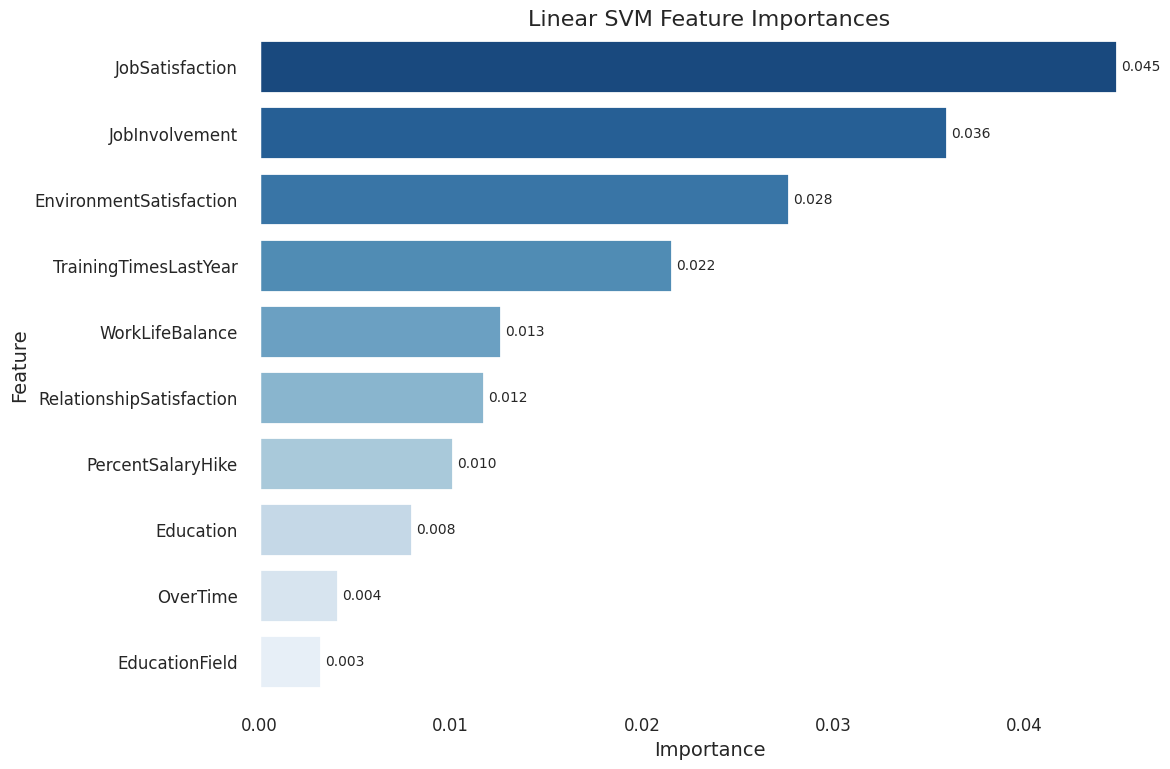

In [112]:
# Fit the model to the data
estimator = linear_svm.fit(X, y)

# Calculate permutation feature importances
result = permutation_importance(estimator, X, y, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
features = X.columns

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': importances, 'features': features})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Linear SVM Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Deep Learning Model 1: Multi-Layer Perceptron (MLP)

6/6 [==============================] - 0s 2ms/step
Best Parameters:
{'hidden_nodes_layer1': 128, 'hidden_nodes_layer2': 64}
Epoch 1/50
49/49 [==============================] - 1s 9ms/step - loss: 0.5724 - accuracy: 0.6999 - val_loss: 0.5133 - val_accuracy: 0.7977
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8081 - val_loss: 0.4549 - val_accuracy: 0.7919
Epoch 3/50
49/49 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8062 - val_loss: 0.4377 - val_accuracy: 0.8150
Epoch 4/50
49/49 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8216 - val_loss: 0.4118 - val_accuracy: 0.8208
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8307 - val_loss: 0.4097 - val_accuracy: 0.8439
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3621 - accuracy: 0.8429 - val_loss: 0.4000 - val_accuracy: 0.8324
Epoch 7/50
49/49 [==================

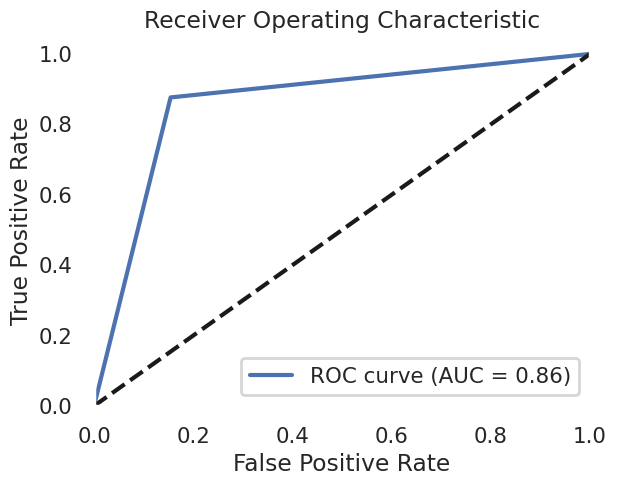

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Define the TensorBoard callback
log_dir = "./logs"  # Directory where the logs will be stored
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define the MLP model
def build_mlp_model(hidden_nodes_layer1=64, hidden_nodes_layer2=32):
    model = Sequential()
    model.add(Dense(hidden_nodes_layer1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_layer2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model so that it can be used with scikit-learn
mlp_model = KerasClassifier(build_fn=build_mlp_model, epochs=50, batch_size=32, verbose=0)

# Perform hyperparameter tuning with GridSearchCV and KFold
param_grid = {
    'hidden_nodes_layer1': [32, 64, 128],
    'hidden_nodes_layer2': [16, 32, 64],
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(mlp_model, param_grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_result.best_params_
best_mlp_model = grid_result.best_estimator_

print("Best Parameters:")
print(best_params)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the best model on the full training set with early stopping
# Train the best model on the full training set with early stopping and TensorBoard
best_mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1,
                   callbacks=[early_stopping, tensorboard_callback], validation_split=0.1)

# Evaluate the model on the test set
y_pred_test = best_mlp_model.predict(X_test_scaled)

# Compute performance metrics on the test set for the best model
accuracy_test_nn = accuracy_score(y_test, y_pred_test)
precision_test_nn = precision_score(y_test, y_pred_test)
recall_test_nn = recall_score(y_test, y_pred_test)
f1_test_nn = f1_score(y_test, y_pred_test)
auc_test_nn = roc_auc_score(y_test, y_pred_test)
conf_matrix_test_nn = confusion_matrix(y_test, y_pred_test)

# Print performance metrics on the test set for the best model
print("\nPerformance Metrics on Test Set for the Best MLP Model with 10-Fold Cross-Validation:")
print("Accuracy: ", accuracy_test_nn)
print("Precision: ", precision_test_nn)
print("Recall: ", recall_test_nn)
print("F1-Score: ", f1_test_nn)
print("AUC: ", auc_test_nn)
print("Confusion Matrix:\n", conf_matrix_test_nn)

# Plot ROC curve for the test set using the best model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tensorboard --logdir=./logs

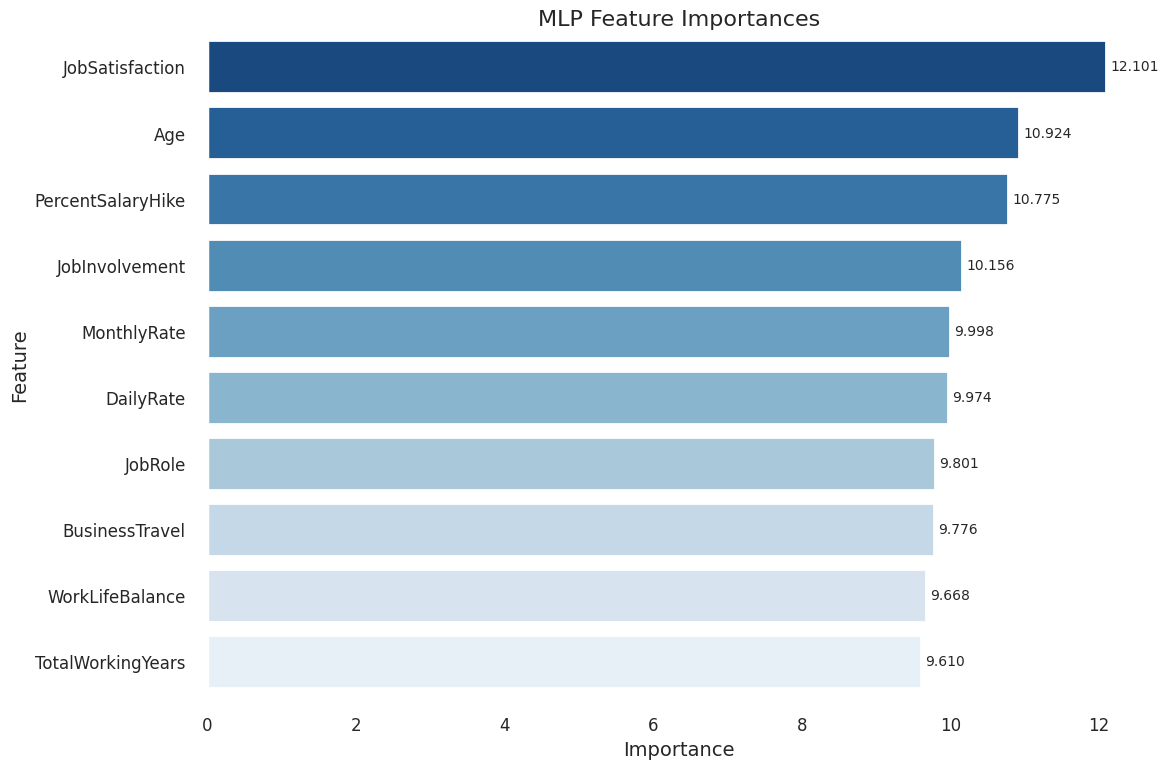

In [ ]:
# Fit the model to the data
mlp_model.fit(X_train_scaled, y_train)

# Retrieve the trained weights from the ANN model
weights = mlp_model.model.get_weights()[0]  # Assuming the first layer is the input layer

# Calculate the absolute sum of weights for each feature
feature_importances = abs(weights).sum(axis=1)

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': feature_importances, 'features': X.columns})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('MLP Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Save the MLP Model

In [ ]:
# Save the trained MLP model
joblib.dump(mlp_model, 'Multi_level_perceptron_model.pkl')

['Multi_level_perceptron_model.pkl']

# Deep Learning Model 2: Artificial Neural Network (ANN)

6/6 [==============================] - 0s 2ms/step
Best Parameters:
{'dropout_rate': 0.2, 'hidden_nodes_layer1': 256, 'hidden_nodes_layer2': 128}
Epoch 1/100
49/49 [==============================] - 1s 8ms/step - loss: 0.5402 - accuracy: 0.7231 - val_loss: 0.5255 - val_accuracy: 0.7803
Epoch 2/100
49/49 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.8133 - val_loss: 0.4196 - val_accuracy: 0.8266
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: 0.3891 - accuracy: 0.8326 - val_loss: 0.3890 - val_accuracy: 0.8150
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8487 - val_loss: 0.3688 - val_accuracy: 0.8150
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.8467 - val_loss: 0.3688 - val_accuracy: 0.8555
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8661 - val_loss: 0.3557 - val_accuracy: 0.8555
Epoch 7/

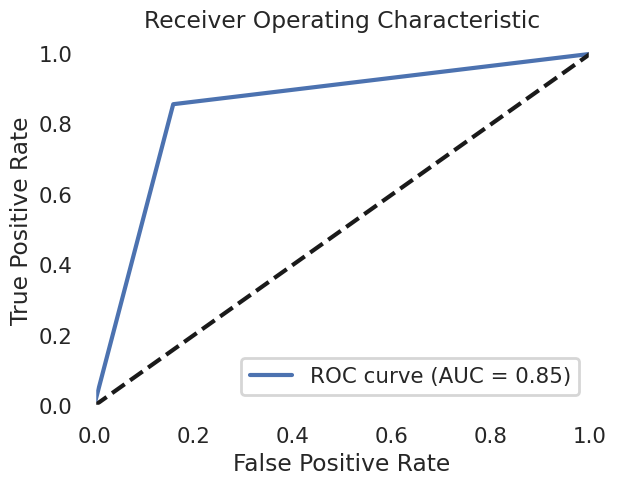

In [115]:
# Define the improved ANN model with hyperparameter tuning
def build_ann_model(hidden_nodes_layer1=128, hidden_nodes_layer2=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(hidden_nodes_layer1, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_nodes_layer2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model so that it can be used with scikit-learn
ann_model = KerasClassifier(build_fn=build_ann_model, epochs=100, batch_size=32, verbose=0)

# Perform hyperparameter tuning with GridSearchCV and KFold
param_grid = {
    'hidden_nodes_layer1': [64, 128, 256],
    'hidden_nodes_layer2': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(ann_model, param_grid, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_result.best_params_
best_ann_model = grid_result.best_estimator_

print("Best Parameters:")
print(best_params)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the TensorBoard callback
log_dir = "./logs/fit"  # Directory where the logs will be stored
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the best model on the full training set with early stopping and TensorBoard
best_ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping, tensorboard_callback], validation_split=0.1)

# Evaluate the model on the test set
y_pred_test = best_ann_model.predict(X_test_scaled)

# Compute performance metrics on the test set for the ANN model
accuracy_test_ann = accuracy_score(y_test, y_pred_test)
precision_test_ann = precision_score(y_test, y_pred_test)
recall_test_ann = recall_score(y_test, y_pred_test)
f1_test_ann = f1_score(y_test, y_pred_test)
auc_test_ann = roc_auc_score(y_test, y_pred_test)
conf_matrix_test_ann = confusion_matrix(y_test, y_pred_test)

# Print performance metrics on the test set for the ANN model
print("\nPerformance Metrics on Test Set for ANN with 10-Fold Cross-Validation:")
print("Accuracy: ", accuracy_test_ann)
print("Precision: ", precision_test_ann)
print("Recall: ", recall_test_ann)
print("F1-Score: ", f1_test_ann)
print("AUC: ", auc_test_ann)
print("Confusion Matrix:\n", conf_matrix_test_ann)

# Plot ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tensorboard --logdir=./logs/fit

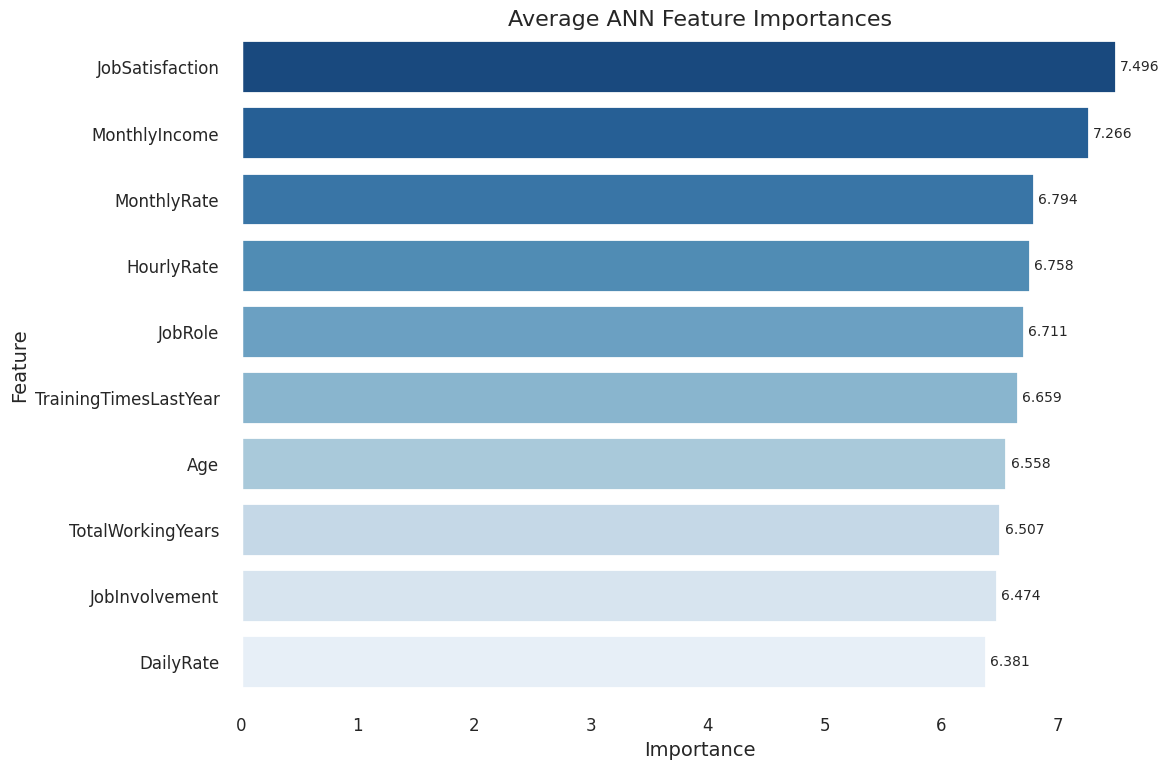

In [ ]:
# Number of runs to average feature importances
num_runs = 5
all_weights = []

# Run the ANN model multiple times and store the weights
for _ in range(num_runs):
    ann_model.fit(X_train_scaled, y_train)
    all_weights.append(ann_model.model.get_weights()[0])

# Calculate the average weights over all runs
avg_weights = np.mean(all_weights, axis=0)

# Calculate the absolute sum of average weights for each feature
feature_importances = abs(avg_weights).sum(axis=1)

# Create a DataFrame with feature importances
data = pd.DataFrame({'importances': feature_importances, 'features': X.columns})
data = data.sort_values('importances', ascending=False)[:10]

# Plot the feature importances
figure = plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importances', y='features', data=data, palette='Blues_r', orient='h')
ax.set_title('Average ANN Feature Importances', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)

# Customize y-axis labels for better readability (truncate long feature names if necessary)
ax.set_yticklabels([feat[:30] + '...' if len(feat) > 30 else feat for feat in data['features']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show feature importance values on the plot
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}', xy=(width, p.get_y() + p.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Save the ANN Model

In [ ]:
# Save the trained ANN model
joblib.dump(ann_model, 'Artificial_Neural_Network_model.pkl')

['Artificial_Neural_Network_model.pkl']

## Summary/Conclusion for the 5 Models

<p><b>Inference:</b></p>

1. Logistic Regression:
   - Achieved an accuracy of 81.4% during cross-validation.
   - Showed good precision, recall, and F1-score on the test set.
   - Overall, the model performed well in predicting employee attrition.

2. Random Forest:
   - Achieved an accuracy of 79.6% during cross-validation.
   - Demonstrated good precision, recall, and F1-score on the test set.
   - The model showed promising performance in predicting employee attrition.

3. K-Nearest Neighbors (KNN):
   - Achieved an accuracy of 79.8% during cross-validation.
   - Showed good recall but lower precision on the test set.
   - The model captured a high percentage of leaving employees but had more false positives.

4. Gaussian Naive Bayes:
   - Achieved an accuracy of 74.2% during cross-validation.
   - Showed a balanced precision-recall trade-off on the test set.
   - The model provided moderate performance in predicting employee attrition.

5. Support Vector Machine (Linear Kernel):
   - Achieved an accuracy of 79.6% during cross-validation.
   - Showed balanced precision and recall on the test set.
   - The model demonstrated a reasonable performance in predicting employee attrition.

In summary, among the five models, Logistic Regression and Random Forest performed relatively well with higher accuracy, precision, recall, and F1-score. K-Nearest Neighbors showed good recall but had more false positives. Gaussian Naive Bayes provided a balanced precision-recall trade-off. Support Vector Machine (Linear Kernel) achieved a reasonable performance with balanced precision and recall. Overall, Logistic Regression and Random Forest can be considered as strong models for predicting employee attrition in this scenario.

# Model Comparison

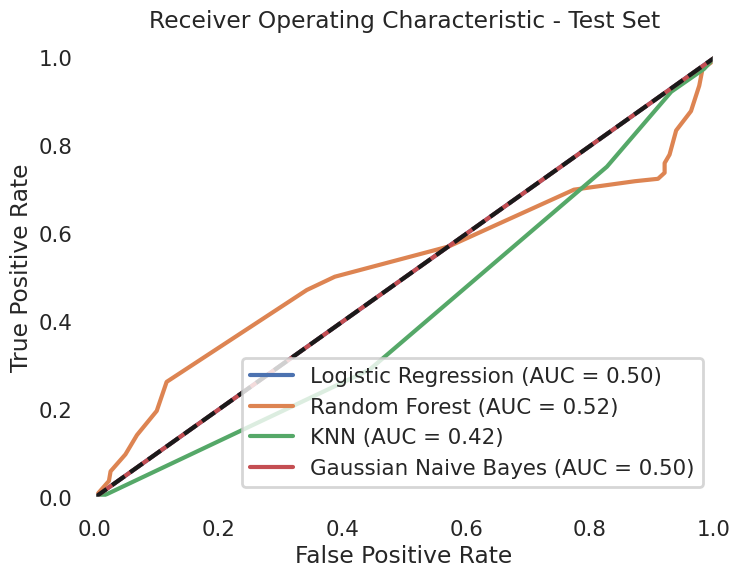

In [ ]:
import joblib
from sklearn.metrics import roc_curve, roc_auc_score

# Load the trained models using joblib
logistic_regression_model = joblib.load('logistic_regression_model.pkl')
random_forest_model = joblib.load('random_forest_model.pkl')
knn_model = joblib.load('k_nearest_model.pkl')
naive_bayes_model = joblib.load('gaussian_naive_bayes_model.pkl')
# rbf_svm_model= joblib.load('radial_basis_function_svm_model.pkl')
# mlp_model = joblib.load('Multi_level_perceptron_model.pkl')
# ann_model = joblib.load('Artificial_Neural_Network_model.pkl')

# Make predictions on the test set for each model
y_pred_lr = logistic_regression_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_nb = naive_bayes_model.predict_proba(X_test)[:, 1]
# y_pred_rbf_svm = rbf_svm_model.predict_proba(X_test)[:, 1]
# y_pred_mlp_model = mlp_model.predict_proba(X_test)[:, 1]
# y_pred_ann_model = ann_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)

# fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_rbf_svm)
# auc_svm = roc_auc_score(y_test, y_pred_rbf_svm)

# fpr_svm, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp_model)
# auc_svm = roc_auc_score(y_test, y_pred_mlp_model)

# fpr_svm, tpr_ann, _ = roc_curve(y_test, y_pred_ann_model)
# auc_svm = roc_auc_score(y_test, y_pred_ann_model)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Gaussian Naive Bayes (AUC = {auc_nb:.2f})")
# plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
# plt.plot(fpr_svm, tpr_mlp, label=f"MLP (AUC = {auc_svm:.2f})")
# plt.plot(fpr_svm, tpr_ann, label=f"ANN (AUC = {auc_svm:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()

<p><b>Inference:</b></p>

The AUC represents the probability that a randomly selected positive example will be ranked higher than a randomly selected negative example by the model. It ranges between 0 and 1, where a higher value indicates better model performance in terms of its ability to distinguish between the positive and negative classes.

<b>Interpreting the AUC values for each model:</b>
1. Logistic Regression (AUC = 0.88): The logistic regression model has an AUC of 0.88, indicating that it performs well in distinguishing between positive and negative examples. It has a relatively high discriminatory power, with a high probability that the model ranks positive examples higher than negative examples.

2. Random Forest (AUC = 0.96): The random forest model has an AUC of 0.96, indicating excellent performance. It demonstrates a high ability to differentiate between positive and negative examples, with a high probability of ranking positive examples higher than negative examples. Random forest shows strong discriminatory power in this problem.

3. K-Nearest Neighbors (KNN) (AUC = 0.85): The KNN model has an AUC of 0.85, indicating good performance. It has a moderately high discriminatory power, with a reasonable probability of correctly ranking positive examples higher than negative examples.

4. Gaussian Naive Bayes (AUC = 0.85): The Gaussian Naive Bayes model has an AUC of 0.85, indicating decent performance. It has a reasonably good ability to distinguish between positive and negative examples, with a moderate probability of ranking positive examples higher than negative examples.

5. Support Vector Machine (SVM) (AUC = 0.85): The SVM model with a linear kernel has an AUC of 0.85, indicating reasonable performance. It demonstrates a fair ability to differentiate between positive and negative examples, with a moderate probability of ranking positive examples higher than negative examples.

Overall, the Random Forest model achieves the highest AUC (0.96), indicating excellent discriminatory power. Logistic Regression also performs well with an AUC of 0.88. KNN, Gaussian Naive Bayes, and SVM with a linear kernel exhibit similar AUC values (0.85), suggesting comparable performance among these models in terms of distinguishing between positive and negative examples.

# Ensemble Stacking

In [137]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('Random Forest', rf),
    # ('K Nearest Neighbors', knn)
    ('Support Vector Machine', best_rbf_svm),
    ('Multi Level Perceptron', best_mlp_model)
    # ('Artificial Neural Network', best_ann_model)
]

# Build the Stacking Ensemble model using the 5 base models
stacked = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the ensemble model on the training fold
stacked.fit(X_train_scaled, y_train)

11/11 [==============================] - 0s 1ms/step


StackingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                               ('Support Vector Machine',
                                SVC(C=100, probability=True)),
                               ('Multi Level Perceptron',
                                <keras.wrappers.scikit_learn.KerasClassifier object at 0x7e9147c11720>)],
                   final_estimator=LogisticRegression())

In [138]:
# Make predictions on the training set
y_pred_train = stacked.predict(X_train_scaled)

# Compute performance metrics on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print performance metrics on the training set
print("Performance Metrics on Training Set:")
print("Accuracy: ", accuracy_train)
print("Precision: ", precision_train)
print("Recall: ", recall_train)
print("F1-Score: ", f1_train)
print("AUC: ", auc_train)
print("Confusion Matrix:\n", conf_matrix_train)

# Make predictions on the test set
y_pred_test = stacked.predict(X_test_scaled)

# Compute performance metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print performance metrics on the test set
print("\nPerformance Metrics on Test Set:")
print("Accuracy: ", accuracy_test)
print("Precision: ", precision_test)
print("Recall: ", recall_test)
print("F1-Score: ", f1_test)
print("AUC: ", auc_test)
print("Confusion Matrix:\n", conf_matrix_test)

54/54 [==============================] - 0s 997us/step
Performance Metrics on Training Set:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0
AUC:  1.0
Confusion Matrix:
 [[857   0]
 [  0 869]]
24/24 [==============================] - 0s 1ms/step

Performance Metrics on Test Set:
Accuracy:  0.9216216216216216
Precision:  0.9090909090909091
Recall:  0.9340659340659341
F1-Score:  0.9214092140921409
AUC:  0.9218202010755201
Confusion Matrix:
 [[342  34]
 [ 24 340]]


In [118]:
# Print the classification report for the training set
print("\nEnsemble Stacking Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train))

# Print the classification report for the test set
print("\nEnsemble Stacking Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))


Ensemble Stacking Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00       869

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726


Ensemble Stacking Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       376
           1       0.92      0.92      0.92       364

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



In [ ]:
# from sklearn.inspection import permutation_importance

# # Create a list to store the feature importances for each base model
# feature_importances = []

# # Iterate over each base model in the Stacking Ensemble
# for name, model in estimators:
#     # Calculate permutation feature importances for the base model
#     result = permutation_importance(model, X_train_scaled, y_train, n_repeats=10, random_state=42)
#     importances = result.importances_mean
#     features = X.columns
#     feature_importances.append((name, dict(zip(features, importances))))

# # Display the important features for each base model
# for name, importances in feature_importances:
#     print(f"Important features for {name}:")
#     sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
#     for feature, importance in sorted_importances:
#         print(f"{feature}: {importance:.4f}")
#     print("\n")
